In [1]:
import numpy as np
import numpy as np
import pandas as pd
import loadData
import monteCarloClass
import time

In [2]:
# Publication-ready plot configuration
import matplotlib.pyplot as plt
import matplotlib as mpl

# Font sizes
FONT_SIZE_LABEL = 18  # Axis labels and tick labels
FONT_SIZE_TITLE = 20  # Plot titles
FONT_SIZE_LEGEND = 18  # Legend text

# Configure matplotlib parameters globally
plt.rcParams.update({
    # Font sizes
    'font.size': FONT_SIZE_LABEL,          # Base font size
    'axes.labelsize': FONT_SIZE_LABEL,     # X and Y axis labels
    'axes.titlesize': FONT_SIZE_TITLE,     # Subplot titles
    'xtick.labelsize': FONT_SIZE_LABEL,    # X tick labels
    'ytick.labelsize': FONT_SIZE_LABEL,    # Y tick labels
    'legend.fontsize': FONT_SIZE_LEGEND,   # Legend
    
    # Font family
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    
    # Line widths
    'axes.linewidth': 1.5,                 # Axis border width
    'grid.linewidth': 1.0,                 # Grid line width
    'lines.linewidth': 2.0,                # Plot line width
    'lines.markersize': 8,                 # Default marker size
    
    # Tick parameters
    'xtick.major.width': 1.5,              # X tick width
    'ytick.major.width': 1.5,              # Y tick width
    'xtick.major.size': 6,                 # X tick length
    'ytick.major.size': 6,                 # Y tick length
    
    # Legend
    'legend.frameon': True,                # Legend frame
    'legend.framealpha': 0.8,              # Legend transparency
    'legend.edgecolor': 'black',           # Legend border color
    
    # Figure
    'figure.dpi': 100,                     # Display resolution
    'savefig.dpi': 300,                    # Save resolution for publication
    'savefig.bbox': 'tight',               # Tight bounding box
    'savefig.pad_inches': 0.1,             # Padding when saving
    
    # Grid
    'axes.grid': False,                    # No grid by default
    'grid.alpha': 0.3,                     # Grid transparency if enabled
})

print("✓ Publication-ready plot configuration loaded")
print(f"  - Axis labels/ticks: {FONT_SIZE_LABEL}pt")
print(f"  - Titles: {FONT_SIZE_TITLE}pt")
print(f"  - Save resolution: 300 DPI")

✓ Publication-ready plot configuration loaded
  - Axis labels/ticks: 18pt
  - Titles: 20pt
  - Save resolution: 300 DPI


load models


In [3]:
import os
import json
import glob
import pandas as pd
from pathlib import Path

def load_all_model_results():
    """Load all model fit results from the model_fits directory"""
    results = []
    
    # Find all JSON files in model_fits directory
    json_files = glob.glob("model_fits/**/*.json", recursive=True)



    
    
    for file_path in json_files:
  
        try:
            with open(file_path, 'r') as f:
                result = json.load(f)
            
            # Extract participant ID and model type from filename if not in data
            filename = os.path.basename(file_path)
            parts = filename.replace('.json', '').split('_')
            #print(parts)
            if 'participantID' not in result:
                result['participantID'] = parts[0]

            
            result['modelType'] = parts[1]+"_"+parts[3]
            
            if parts[2]!="LapseFree":
                #print("Lapse fixed model, skipping")
                continue

            # Skip results with specific model types
            excluded_models = ["gaussian_sharedPrior", "fusionOnly_sharedPrior", "probabilityMatching_sharedPrior", "switching_sharedPrior"]
            if any(model in result['modelType'] for model in excluded_models):
                # Skip this result
                os.remove(file_path)
                continue
            

            results.append(result)
            
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    return results

# Load all results
all_results = load_all_model_results()
print(f"Loaded {len(all_results)} model fit results")

# Convert to DataFrame for easier analysis
df_results = pd.DataFrame(all_results)
print(f"Participants: {sorted(df_results['participantID'].unique())}")
print(f"Models: {sorted(df_results['modelType'].unique())}\n number of models in comparison is: {len(df_results['modelType'].unique())} ")


Loaded 78 model fit results
Participants: ['all', 'as', 'dt', 'hh', 'ip', 'ln1', 'ln2', 'mh', 'ml', 'mt', 'oy', 'qs', 'sx']
Models: ['fusionOnlyLogNorm_sharedPrior', 'logLinearMismatch_sharedPrior', 'lognorm_sharedPrior', 'probabilityMatchingLogNorm_sharedPrior', 'selection_sharedPrior', 'switchingFree_sharedPrior']
 number of models in comparison is: 6 


In [4]:

participantIds=sorted(df_results['participantID'].unique())
modelTypes=sorted(df_results['modelType'].unique())
nParticipants=len(participantIds)
nModels=len(modelTypes)

import fitSaver
import os
participantID="as"
modelType="fusionOnlyLogNorm"

# simulate



 Load data

In [5]:
# import bootstrapperSaveLoad functions
import matplotlib.pyplot as plt
from bootstrapperSaveLoad import saveBootstrappedParams, loadBootstrappedParams
import loadResults
import os
import json
import seaborn as sns

# parameter recovery

In [13]:
# Load Parameter Recovery Results from JSON files
import numpy as np
import pandas as pd
import json
import os
from glob import glob

def load_recovery_results(base_dir="parameter_recovery_results", modelType="lognorm"):
    """
    Load parameter recovery results from saved JSON files.
    
    Args:
        base_dir: directory containing the recovery results
        modelType: the model type to load results for
    
    Returns:
        List of recovery result dictionaries
    """
    recovery_results = []
    
    # Find all recovery JSON files
    pattern = os.path.join(base_dir, "*", f"*_{modelType}_recovery.json")
    json_files = glob(pattern)
    
    print(f"Found {len(json_files)} recovery result files")
    
    for json_file in sorted(json_files):
        try:
            with open(json_file, 'r') as f:
                result = json.load(f)
            recovery_results.append(result)
            participantID = result.get('participantID', 'unknown')
            n_successful = result.get('n_successful', 0)
            print(f"Loaded {participantID}: {n_successful} successful recoveries")
        except Exception as e:
            print(f"Error loading {json_file}: {e}")
    
    return recovery_results

# Load the recovery results
recovery_results = load_recovery_results(modelType="lognorm")

print(f"\nTotal participants with recovery results: {len(recovery_results)}")

# Display summary
if recovery_results:
    print("\nSummary:")
    for result in recovery_results:
        pid = result['participantID']
        true_p = np.array(result['true_params'])
        recovered_p = np.array(result['recovered_params_mean'])
        print(f"{pid}: True params: {np.round(true_p, 3)}, Recovered (mean): {np.round(recovered_p, 3)}")

Found 11 recovery result files
Loaded as: 50 successful recoveries
Loaded dt: 50 successful recoveries
Loaded hh: 50 successful recoveries
Loaded ip: 50 successful recoveries
Loaded ln2: 50 successful recoveries
Loaded mh: 50 successful recoveries
Loaded ml: 50 successful recoveries
Loaded mt: 50 successful recoveries
Loaded oy: 50 successful recoveries
Loaded qs: 50 successful recoveries
Loaded sx: 50 successful recoveries

Total participants with recovery results: 11

Summary:
as: True params: [0.052 0.229 0.5   0.647 0.596 0.096 0.02 ], Recovered (mean): [0.076 0.257 0.52  0.66  0.624 0.113 0.044]
dt: True params: [0.3   0.198 0.306 0.565 0.527 0.23  0.219], Recovered (mean): [0.234 0.241 0.439 0.621 0.709 0.161 0.167]
hh: True params: [1.00e-03 1.09e-01 2.49e-01 9.56e-01 1.43e+00 3.60e-02 5.90e-02], Recovered (mean): [0.028 0.105 0.208 0.91  1.776 0.07  0.069]
ip: True params: [0.133 0.251 0.814 0.171 0.807 0.089 0.011], Recovered (mean): [0.148 0.246 1.686 0.535 0.819 0.094 0.051]

In [15]:
# Run Parameter Recovery Analysis
import numpy as np
from tqdm import tqdm

def run_parameter_recovery(participantIds, modelType="lognorm", n_recovery=50, nSimul=500, nStarts=1,
                           save_dir="parameter_recovery_results"):
    """
    Parameter Recovery Analysis:
    For each participant:
      1. Load their fitted parameters (ground truth)
      2. Simulate synthetic datasets using those parameters
      3. Re-fit the model to each synthetic dataset
      4. Compare recovered parameters to ground truth
    
    Args:
        participantIds: list of participant IDs to run recovery for
        modelType: model name (e.g., 'lognorm', 'fusionOnlyLogNorm')
        n_recovery: number of recovery iterations per participant
        nSimul: Monte Carlo simulations for fitting
        nStarts: optimization starting points
        save_dir: directory to save results
    
    Returns:
        List of recovery results with true params, recovered params, and statistics
    """
    all_recovery_results = []
    
    for participantID in tqdm(participantIds, desc="Parameter Recovery"):
        # Check if results already exist
        participant_dir = os.path.join(save_dir, participantID)
        result_path = os.path.join(participant_dir, f"{participantID}_{modelType}_recovery.json")
        
        if os.path.exists(result_path):
            print(f"Loading existing results for {participantID}")
            with open(result_path, 'r') as f:
                existing_result = json.load(f)
            all_recovery_results.append(existing_result)
            continue
        
        # Load original data and fitted parameters
        data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
        
        mc_original = monteCarloClass.OmerMonteCarlo(data)
        mc_original.modelName = modelType
        mc_original.freeP_c = False
        mc_original.sharedLambda = False
        mc_original.dataName = dataName
        mc_original.nSimul = nSimul
        mc_original.nStart = nStarts
        
        try:
            res = loadResults.loadFitResults(mc_original, dataName, modelName=modelType)
            true_params = np.array(res['fittedParams'])
        except Exception as e:
            print(f"Could not load {modelType} results for {participantID}: {e}")
            continue
        
        # Run recovery iterations
        recovered_params_list = []
        
        for iter_idx in tqdm(range(n_recovery), desc=f"  {participantID}", leave=False):
            # Simulate data from true parameters
            sim_data = mc_original.simulateMonteCarloData(true_params, data)
            
            # Create fitter for simulated data
            mc_recovery = monteCarloClass.OmerMonteCarlo(sim_data)
            mc_recovery.modelName = modelType
            mc_recovery.freeP_c = False
            mc_recovery.sharedLambda = False
            mc_recovery.nSimul = nSimul
            mc_recovery.nStart = nStarts
            mc_recovery.optimizationMethod = 'scipy'
            mc_recovery.dataName = f"{participantID}_recovery_{iter_idx}"
            
            try:
                # Fit model to recover parameters
                recovered_params = mc_recovery.fitCausalInferenceMonteCarlo(mc_recovery.groupedData)
                if recovered_params is not None:
                    recovered_params_list.append(recovered_params)
            except Exception as e:
                print(f"  Recovery iteration {iter_idx} failed: {e}")
                continue
        
        if len(recovered_params_list) > 0:
            recovered_params_array = np.array(recovered_params_list)
            
            # Calculate statistics
            result = {
                'participantID': participantID,
                'modelType': modelType,
                'true_params': true_params.tolist(),
                'recovered_params_mean': np.mean(recovered_params_array, axis=0).tolist(),
                'recovered_params_std': np.std(recovered_params_array, axis=0).tolist(),
                'recovered_params_median': np.median(recovered_params_array, axis=0).tolist(),
                'n_successful': len(recovered_params_list),
                'n_attempted': n_recovery,
                'all_recovered_params': recovered_params_array.tolist()
            }
            
            all_recovery_results.append(result)
            
            # Save results
            os.makedirs(participant_dir, exist_ok=True)
            with open(result_path, 'w') as f:
                json.dump(result, f, indent=2)
            
            print(f"✓ {participantID}: {len(recovered_params_list)}/{n_recovery} successful recoveries")
            bias = np.mean(recovered_params_array - true_params, axis=0)
            print(f"  Mean bias: {np.round(bias, 4)}")
        else:
            print(f"✗ {participantID}: No successful recoveries")
    
    return all_recovery_results

# # Example: Run parameter recovery for all participants
# # Uncomment and run when ready:
# recovery_results = run_parameter_recovery(
#     participantIds[1:],
#     modelType="lognorm",
#     n_recovery=50,  # 50 iterations recommended for publication
#     nSimul=500,
#     nStarts=1
# )

Styled output unavailable (jinja2 missing). Falling back to text table.
Parameter  Mean Corr  Mean Bias     RMSE  Mean SE
      λ_1   0.960254   0.014100 0.031092 0.046896
      σ_a   0.926799   0.027859 0.059629 0.089386
      σ_v   0.920353   0.159777 0.317722 0.284571
      p_c   0.623746  -0.037585 0.174721 0.179479
     σ_a2   0.968555   0.143660 0.222570 0.236824
      λ_2   0.949373   0.014288 0.034309 0.048911
      λ_3   0.972060   0.007270 0.026286 0.044228

Mean diagonal correlation: 0.903
Mean RMSE: 0.124


,Parameter,Mean Corr,Mean Bias,RMSE,Mean SE
0,λ_1,0.960254,0.014100,0.031092,0.046896
1,σ_a,0.926799,0.027859,0.059629,0.089386
2,σ_v,0.920353,0.159777,0.317722,0.284571
3,p_c,0.623746,-0.037585,0.174721,0.179479
4,σ_a2,0.968555,0.143660,0.222570,0.236824
5,λ_2,0.949373,0.014288,0.034309,0.048911
6,λ_3,0.972060,0.007270,0.026286,0.044228


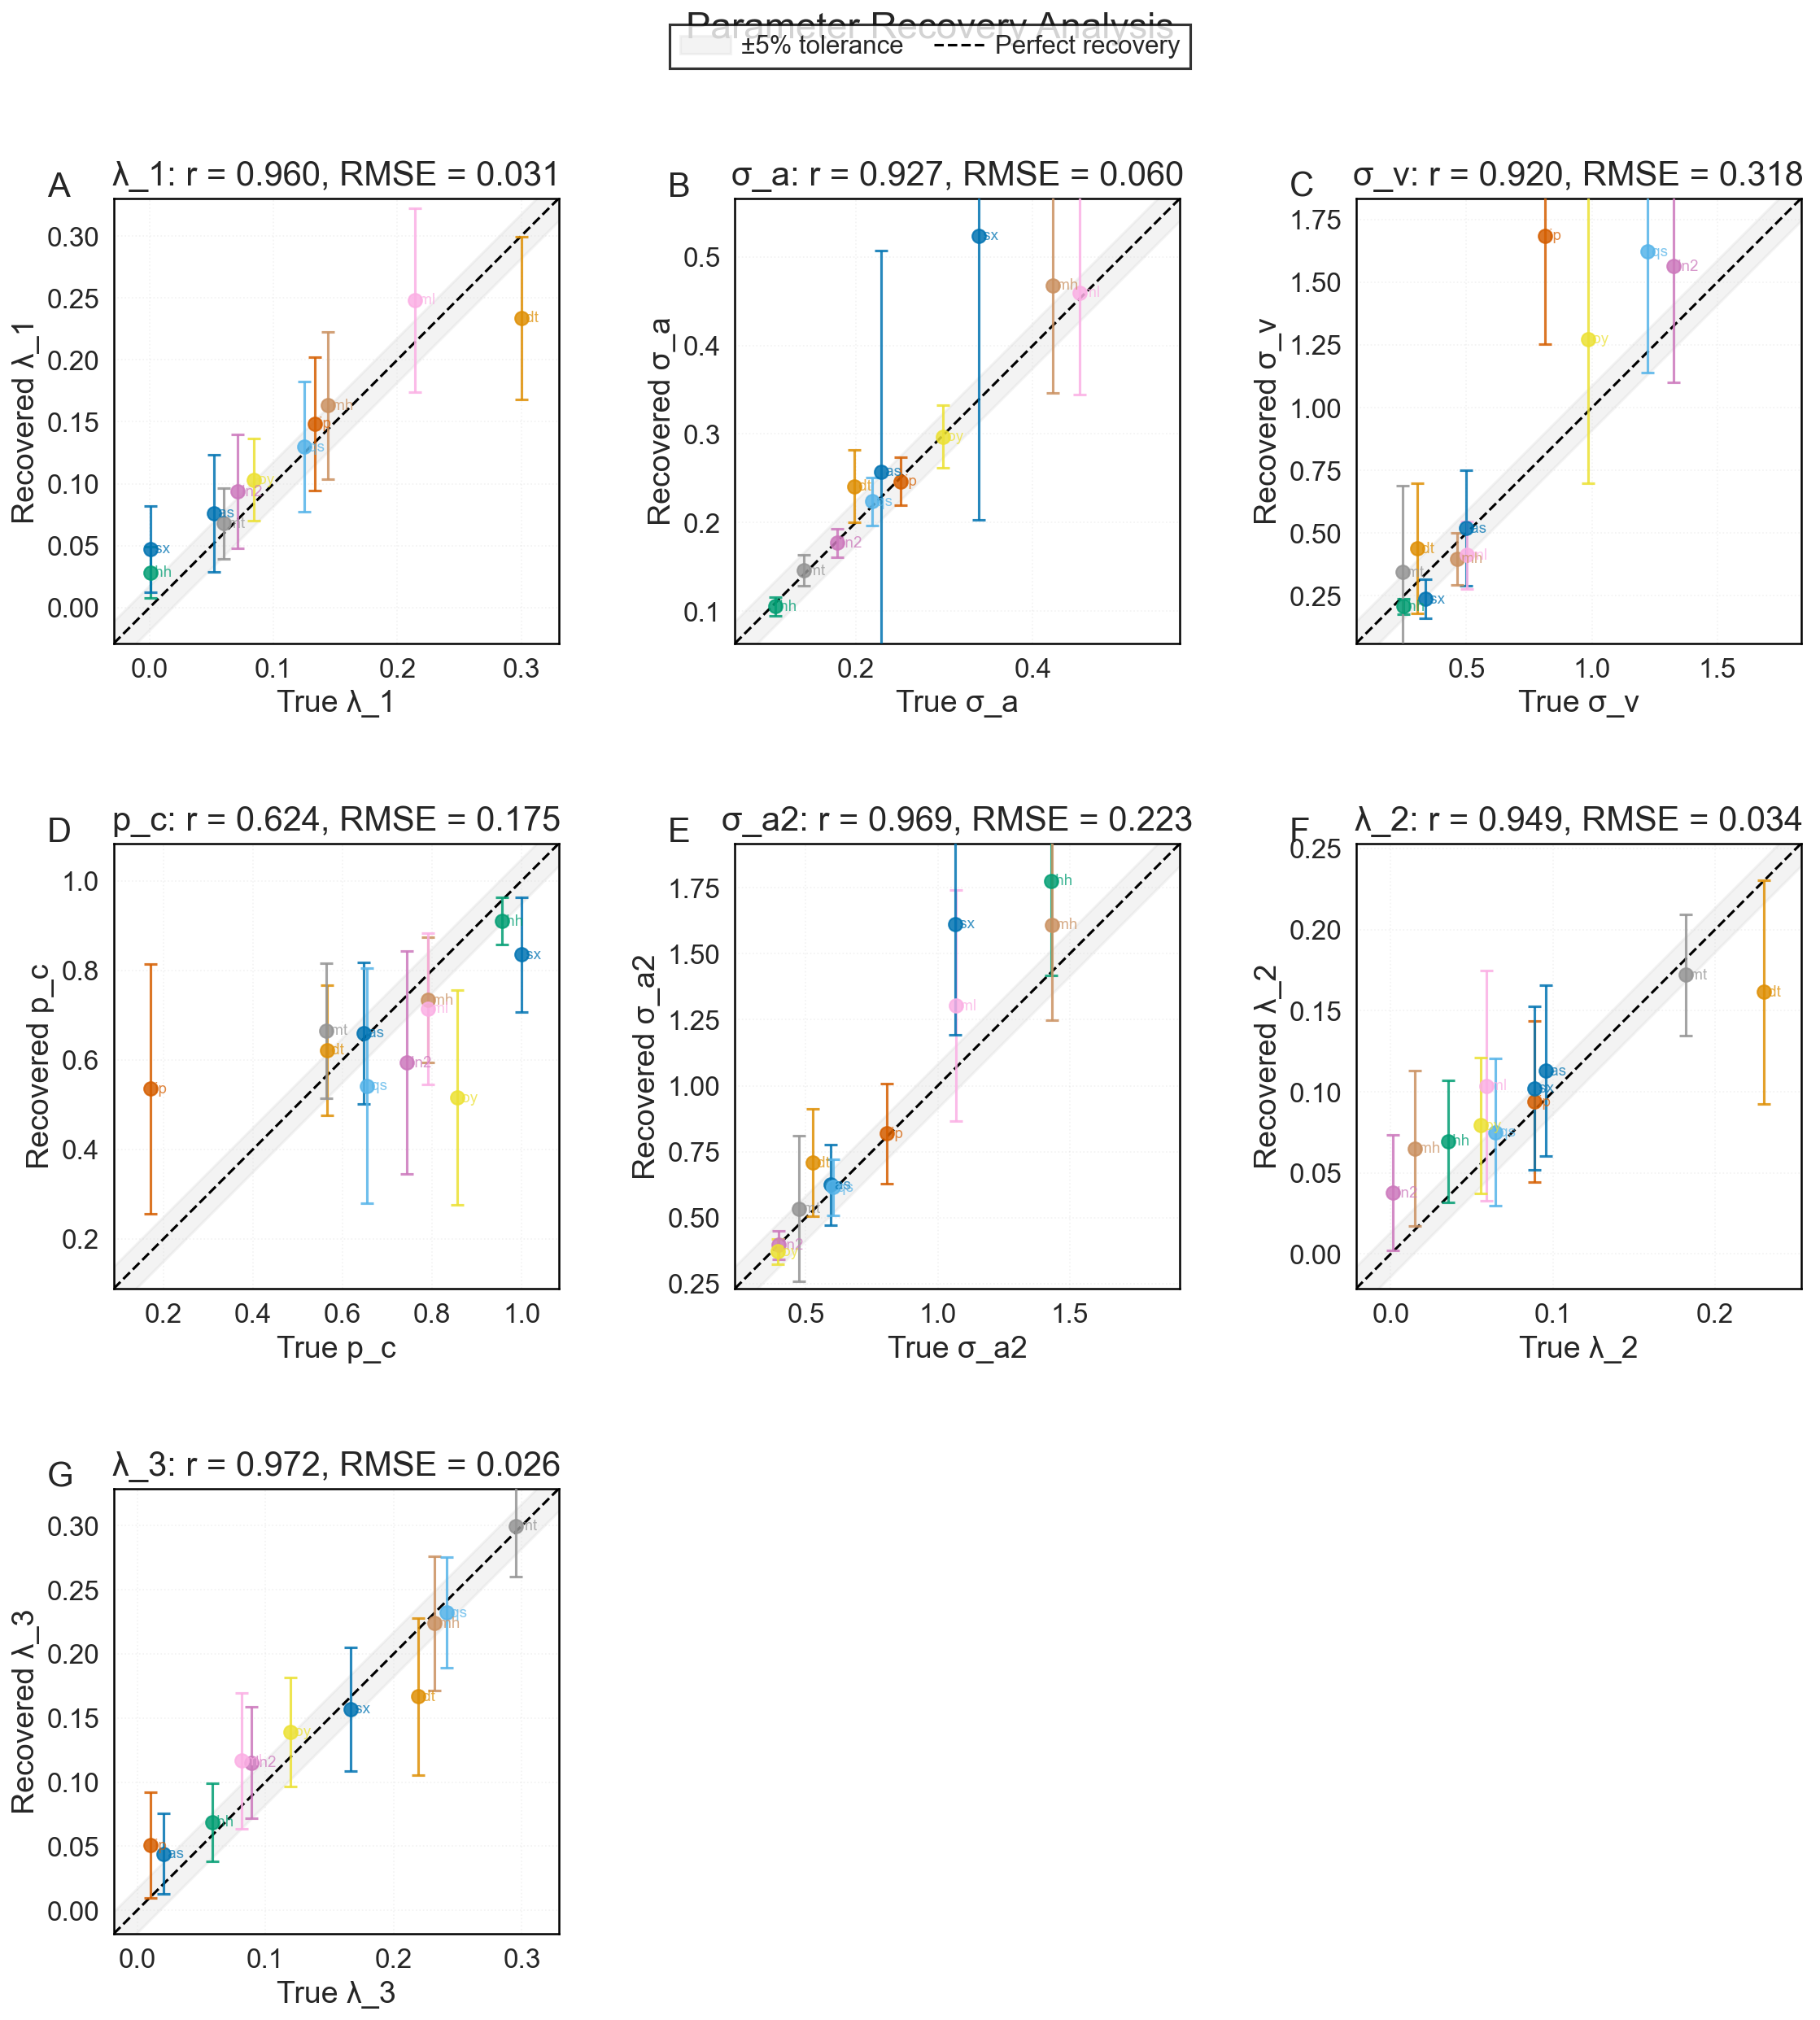

In [37]:
# Plot Parameter Recovery Results
import math
from IPython.display import display
import seaborn as sns
sns.set_theme(context="talk", style="whitegrid")

def safe_display_df(df, fmt=None, gradient_subset=None, cmap="Blues"):
    """Gracefully show styled tables when jinja2 is available."""
    try:
        import jinja2  # noqa: F401
        styler = df.style
        if fmt:
            styler = styler.format(fmt)
        if gradient_subset:
            styler = styler.background_gradient(cmap=cmap, subset=gradient_subset)
        display(styler)
    except Exception:
        print("Styled output unavailable (jinja2 missing). Falling back to text table.")
        print(df.to_string(index=False))


def plot_parameter_recovery(recovery_results, param_names=None, annotate_points=True, save_path=None):
    """
    Visualize parameter recovery with publication-ready aesthetics.

    Args:
        recovery_results: List of dictionaries produced by the recovery pipeline.
        param_names: Optional list of parameter labels matching the fitted model.
        annotate_points: Whether to label each point with its participant ID.
        save_path: Optional filepath (without extension) to save the generated figures.
    """
    if not recovery_results:
        print("No recovery results available to plot.")
        return None

    if param_names is None:
        param_names = ['λ_1', 'σ_a', 'σ_v', 'p_c', 'σ_a2', 'λ_2', 'λ_3']

    n_params = len(recovery_results[0]['true_params'])
    participants = [r['participantID'] for r in recovery_results]

    # Use colorblind-friendly palette
    palette = sns.color_palette("colorblind", len(participants))

    n_cols = min(3, n_params)
    n_rows = math.ceil(n_params / n_cols)

    # Journal-ready figure size: slightly larger panels to avoid overlap
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6.0 * n_cols, 6 * n_rows), 
                             squeeze=False, dpi=150)
    axes = axes.flatten()

    summary_rows = []

    # Panel labels for multi-panel figures
    panel_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

    for p_idx in range(n_params):
        ax = axes[p_idx]
        param_label = param_names[p_idx] if p_idx < len(param_names) else f'Param {p_idx+1}'
        true_vals = np.array([r['true_params'][p_idx] for r in recovery_results], dtype=float)
        recovered_vals = np.array([r['recovered_params_mean'][p_idx] for r in recovery_results], dtype=float)
        recovered_stds = np.array([r['recovered_params_std'][p_idx] for r in recovery_results], dtype=float)

        all_vals = np.concatenate([true_vals, recovered_vals])
        span = all_vals.max() - all_vals.min()
        padding = 0.1 * span if span > 0 else 0.5
        lower, upper = all_vals.min() - padding, all_vals.max() + padding
        diag_x = np.linspace(lower, upper, 200)
        tolerance = 0.05 * (upper - lower)

        # Tolerance band with subtle styling
        ax.fill_between(diag_x, diag_x - tolerance, diag_x + tolerance, 
                        color='lightgray', alpha=0.25, 
                        label='±5% tolerance' if p_idx == 0 else None, 
                        zorder=1)

        # Unity line with clear contrast
        ax.plot([lower, upper], [lower, upper], 
                color='black', linestyle='--', linewidth=1.5, 
                label='Perfect recovery' if p_idx == 0 else None, 
                zorder=2)

        # Plot data points with error bars
        for idx, participant in enumerate(participants):
            color = palette[idx]
            ax.errorbar(true_vals[idx], recovered_vals[idx], yerr=recovered_stds[idx], 
                       fmt='o', color=color, ecolor=color, 
                       elinewidth=1.5, capsize=4, capthick=1.5,
                       markersize=8, alpha=0.85, zorder=3)
            if annotate_points:
                # offset text a bit to reduce overlap
                ax.text(true_vals[idx], recovered_vals[idx], f" {participant}", 
                       fontsize=9, color=color, alpha=0.75, 
                       va='center', ha='left', zorder=4)

        # Calculate statistics
        corr = np.corrcoef(true_vals, recovered_vals)[0, 1] if len(true_vals) > 1 else np.nan
        bias = np.mean(recovered_vals - true_vals)
        rmse = np.sqrt(np.mean((recovered_vals - true_vals) ** 2))

        # Axis labels with proper formatting (regular weight)
        ax.set_xlabel(f'True {param_label}', fontsize=FONT_SIZE_LABEL)
        ax.set_ylabel(f'Recovered {param_label}', fontsize=FONT_SIZE_LABEL)

        # Title with statistics (regular weight)
        ax.set_title(f'{param_label}: r = {corr:.3f}, RMSE = {rmse:.3f}', 
                    fontsize=FONT_SIZE_TITLE, pad=8)

        # Add panel label (regular weight, smaller)
        if p_idx < len(panel_labels):
            ax.text(-0.15, 1.06, panel_labels[p_idx], transform=ax.transAxes,
                   fontsize=FONT_SIZE_TITLE, va='top')

        ax.set_xlim(lower, upper)
        ax.set_ylim(lower, upper)
        ax.set_box_aspect(1)

        # Clean grid styling
        ax.grid(True, which='major', alpha=0.25, linewidth=0.8, linestyle=':')
        ax.set_axisbelow(True)

        # Spine styling
        for spine in ax.spines.values():
            spine.set_linewidth(1.2)
            spine.set_color('black')

        # Tick parameters
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_LABEL-2, 
                      width=1.2, length=5, direction='out')

        summary_rows.append({
            'Parameter': param_label,
            'Mean Corr': corr,
            'Mean Bias': bias,
            'RMSE': rmse,
            'Mean SE': np.mean(recovered_stds)
        })

    # Hide unused subplots
    for remaining_ax in axes[n_params:]:
        remaining_ax.axis('off')

    # Create legend with clean styling
    handles, labels = axes[0].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='upper center', 
                  bbox_to_anchor=(0.5, 0.985),
                  ncol=len(handles), frameon=True, 
                  fontsize=FONT_SIZE_LEGEND-3, 
                  edgecolor='black', fancybox=False,
                  columnspacing=1.2, handletextpad=0.4)

    # Main title (regular weight)
    fig.suptitle('Parameter Recovery Analysis', 
                fontsize=FONT_SIZE_TITLE + 2, y=0.985)

    # Adjust layout to prevent overlap; increase spacing between subplots
    fig.subplots_adjust(top=0.90, hspace=0.45, wspace=0.35)

    # Save with high quality
    if save_path:
        fig.savefig(f"{save_path}_scatter.png", dpi=600, bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        fig.savefig(f"{save_path}_scatter.pdf", bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        print(f"Saved: {save_path}_scatter.png (600 DPI) and {save_path}_scatter.pdf")

    # Display summary table
    summary_df = pd.DataFrame(summary_rows)
    column_formats = {'Mean Corr': "{:.3f}", 'Mean Bias': "{:.3f}", 'RMSE': "{:.3f}", 'Mean SE': "{:.3f}"}
    safe_display_df(summary_df, fmt=column_formats, gradient_subset=['Mean Corr'], cmap="Blues")
    print("\nMean diagonal correlation:", summary_df['Mean Corr'].mean().round(3))
    print(f"Mean RMSE: {summary_df['RMSE'].mean():.3f}")

    return summary_df

# Uncomment to plot after running recovery
plot_parameter_recovery(recovery_results)


# Bootstrap analysis

In [11]:
# Bootstrap Analysis for Parameter Uncertainty - FIXED VERSION
# This gives us confidence intervals for fitted parameters
import numpy as np
from tqdm import tqdm
def run_bootstrap_analysis(participantIds, modelType="lognorm", n_boot=50, nSimul_boot=300, maxiter=200):
    """
    Parametric bootstrap for parameter uncertainty estimation.
    For each participant:
    1. Simulate datasets from fitted parameters
    2. Re-fit each simulated dataset (with proper optimization)
    3. Compute CI from distribution of recovered parameters
    
    KEY FIX: We need to:
    - Add noise to starting point to avoid getting stuck at the same optimum
    - Use more iterations
    - Potentially use random restarts
    """
    from scipy.optimize import minimize
    
    bootstrap_results = []
    
    for participantID in tqdm(participantIds, desc="Bootstrap Analysis"):
        # Load data and fitted parameters
        data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
        mc_fitter = monteCarloClass.OmerMonteCarlo(data)
        mc_fitter.modelName = modelType
        mc_fitter.freeP_c = False
        mc_fitter.sharedLambda = False
        mc_fitter.dataName = dataName
        mc_fitter.nSimul = nSimul_boot
        
        try:
            res = loadResults.loadFitResults(mc_fitter, dataName, modelName=mc_fitter.modelName)
            best_params = np.array(res['fittedParams'])
            mc_fitter.modelFit = best_params
        except Exception as e:
            print(f"Could not load results for {participantID}: {e}")
            continue
        
        boot_samples = []
        
        for b in tqdm(range(n_boot), desc=f"  Bootstrap {participantID}", leave=False):
            # Simulate data using fitted parameters
            sim_df = mc_fitter.simulateMonteCarloData(best_params, mc_fitter.data)
            
            # Create fitter for bootstrap dataset
            boot_fitter = monteCarloClass.OmerMonteCarlo(sim_df)
            boot_fitter.modelName = modelType
            boot_fitter.freeP_c = False
            boot_fitter.sharedLambda = False
            boot_fitter.nSimul = nSimul_boot
            boot_fitter.nStart = 1
            boot_fitter.optimizationMethod = 'scipy'
            
            # FIT THE MODEL PROPERLY (not just minimize from best_params)
            # This will use proper bounds and optimization
            try:
                boot_params = boot_fitter.fitCausalInferenceMonteCarlo(boot_fitter.groupedData)
                if boot_params is not None:
                    boot_samples.append(boot_params)
            except Exception as e:
                print(f"  Bootstrap {b} failed: {e}")
                continue
        
        if len(boot_samples) > 0:
            boot_samples = np.array(boot_samples)
            
            # Calculate statistics
            ci_low = np.percentile(boot_samples, 2.5, axis=0)
            ci_high = np.percentile(boot_samples, 97.5, axis=0)
            
            bootstrap_results.append({
                'participantID': participantID,
                'best_params': best_params.tolist(),
                'boot_mean': np.mean(boot_samples, axis=0).tolist(),
                'boot_std': np.std(boot_samples, axis=0).tolist(),
                'ci_low': ci_low.tolist(),
                'ci_high': ci_high.tolist(),
                'n_successful': len(boot_samples),
                'boot_samples': boot_samples.tolist()
            })
            
            print(f"\n{participantID} bootstrap variance: {np.round(np.std(boot_samples, axis=0), 4)}")
            
            # Save individual bootstrap results
            save_dir = os.path.join("bootstrap_results", participantID)
            os.makedirs(save_dir, exist_ok=True)
            save_path = os.path.join(save_dir, f"{participantID}_{modelType}_bootstrap.json")
            with open(save_path, 'w') as f:
                json.dump(bootstrap_results[-1], f, indent=2)
            print(f"Saved bootstrap results for {participantID}")
    
    return bootstrap_results

# Run bootstrap - REDUCED n_boot for testing (increase for final analysis)
# This will take longer but give proper uncertainty estimates
bootstrap_results = run_bootstrap_analysis(
    participantIds[1:3],  # Start with just 2 participants to test
    modelType="lognorm", 
    n_boot=10,  # Reduced for testing - use 50-100 for publication
    nSimul_boot=300
)

Bootstrap Analysis:   0%|          | 0/2 [00:00<?, ?it/s]

Data bounds: t_min=0.021, t_max=0.954
=== DEBUGGING FITTING COMPONENTS ===
Data bounds: t_min=0.021, t_max=0.954
Grouped data shape: (419, 11)
Configuration: sharedLambda=False, freeP_c=False
Model: lognorm
Expected parameter length: 7
Test params length: 7, values: [0.1 0.5 0.5 0.5 0.8 0.1 0.1]
✓ Parameter extraction tested for 3 conditions
Test likelihood: 3474.5285649715875
=== ALL COMPONENTS TESTED SUCCESSFULLY ===
Fitting with shared p_c parameter across SNR conditions.
Bounds shape: (7, 2)
Using fixed t_min=0.021, t_max=0.954 from data
Testing likelihood function with reasonable parameters...
Test likelihood evaluation: 3471.443867479447

Starting 1 optimization attempts using 'scipy'...
Model is lognorm



Bootstrap Analysis:   0%|          | 0/2 [00:09<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Inspect bootstrap results structure
if bootstrap_results:
    print(f"Number of participants: {len(bootstrap_results)}")
    for r in bootstrap_results[:2]:  # Check first 2 participants
        print(f"\nParticipant: {r['participantID']}")
        print(f"  Best params: {np.round(r['best_params'], 4)}")
        print(f"  Boot mean:   {np.round(r['boot_mean'], 4)}")
        print(f"  Boot std:    {np.round(r['boot_std'], 4)}")
        print(f"  CI low:      {np.round(r['ci_low'], 4)}")
        print(f"  CI high:     {np.round(r['ci_high'], 4)}")
        print(f"  N successful: {r['n_successful']}")
        
        # Check if all boot_samples are the same
        boot_samples = np.array(r['boot_samples'])
        print(f"  Boot samples shape: {boot_samples.shape}")
        print(f"  Boot samples variance per param: {np.var(boot_samples, axis=0)}")
        
        # Check first few boot samples
        print(f"  First 3 boot samples:")
        for i in range(min(3, len(boot_samples))):
            print(f"    Sample {i}: {np.round(boot_samples[i], 4)}")

In [27]:
# Plot Bootstrap Results
import math
from IPython.display import display

def plot_bootstrap_results(bootstrap_results, param_names=None, highlight_participant=None, save_prefix=None):
    """
    Publication-ready visualization for bootstrap parameter uncertainty.

    Args:
        bootstrap_results: Output from run_bootstrap_analysis.
        param_names: Optional list of parameter labels.
        highlight_participant: Participant ID to showcase in distribution plots.
        save_prefix: Optional filepath prefix for saving figures (PNG at 300 DPI).
    """
    if not bootstrap_results:
        print("No bootstrap results available to visualize.")
        return None

    if param_names is None:
        param_names = ['λ₁', 'σ_a', 'σ_v', 'p_c', 'σ_a2', 'λ₂', 'λ₃']

    sns.set_theme(context="talk", style="whitegrid")
    n_params = len(bootstrap_results[0]['best_params'])
    participants = [r['participantID'] for r in bootstrap_results]
    palette = sns.color_palette("tab20", len(participants))

    # --- Figure 1: Estimates with 95% CI across participants ---
    n_cols = min(3, n_params)
    n_rows = math.ceil(n_params / n_cols)
    fig_ci, axes_ci = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4.8 * n_rows), squeeze=False)
    axes_ci = axes_ci.flatten()

    for p_idx in range(n_params):
        ax = axes_ci[p_idx]
        param_label = param_names[p_idx] if p_idx < len(param_names) else f'Param {p_idx+1}'
        best_vals = np.array([r['best_params'][p_idx] for r in bootstrap_results], dtype=float)
        ci_lows = np.array([r['ci_low'][p_idx] for r in bootstrap_results], dtype=float)
        ci_highs = np.array([r['ci_high'][p_idx] for r in bootstrap_results], dtype=float)
        ci_widths = ci_highs - ci_lows
        y_pos = np.arange(len(participants))

        for idx, participant in enumerate(participants):
            err_low = best_vals[idx] - ci_lows[idx]
            err_high = ci_highs[idx] - best_vals[idx]
            ax.errorbar(best_vals[idx], idx, xerr=np.array([[err_low], [err_high]]), fmt='o',
                        color=palette[idx], ecolor=palette[idx], elinewidth=1.5, capsize=4, markersize=7)

        ax.set_yticks(y_pos)
        ax.set_yticklabels(participants, fontsize=10)
        ax.set_xlabel(param_label)
        ax.set_title(f'{param_label} 95% CI (median width = {np.median(ci_widths):.2f})',  fontsize=14)
        ax.grid(True, axis='x', alpha=0.3)
        sns.despine(ax=ax, left=False, bottom=False)

    for ax in axes_ci[n_params:]:
        ax.axis('off')

    fig_ci.suptitle('Bootstrap Parameter Estimates with 95% Confidence Intervals', fontsize=18,  y=1.02)
    fig_ci.tight_layout(rect=[0, 0, 1, 0.97])

    if save_prefix:
        fig_ci.savefig(f"{save_prefix}_ci.png", dpi=300, bbox_inches='tight')

    # --- Figure 2: Distributions for highlighted participant ---
    if highlight_participant is None:
        highlight_participant = bootstrap_results[0]['participantID']

    example = next((r for r in bootstrap_results if r['participantID'] == highlight_participant), bootstrap_results[0])
    boot_samples = np.array(example.get('boot_samples', []))
    if boot_samples.size > 0:
        fig_dist, axes_dist = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4.6 * n_rows), squeeze=False)
        axes_dist = axes_dist.flatten()

        for p_idx in range(n_params):
            ax = axes_dist[p_idx]
            param_label = param_names[p_idx] if p_idx < len(param_names) else f'Param {p_idx+1}'
            sns.histplot(boot_samples[:, p_idx], bins=20, stat='density', color='steelblue', edgecolor='white', alpha=0.85, ax=ax)
            sns.kdeplot(boot_samples[:, p_idx], color='black', linewidth=1.5, ax=ax)
            ax.axvline(example['best_params'][p_idx], color='firebrick', linestyle='--', linewidth=2, label='Best fit')
            ax.axvspan(example['ci_low'][p_idx], example['ci_high'][p_idx], color='gold', alpha=0.2, label='95% CI')
            ax.set_xlabel(param_label)
            ax.set_ylabel('Density')
            ax.set_title(f'{param_label}', )
            if p_idx == 0:
                ax.legend(frameon=False, fontsize=11)
            sns.despine(ax=ax)

        for ax in axes_dist[n_params:]:
            ax.axis('off')

        fig_dist.suptitle(f'Bootstrap Distributions – Participant {example["participantID"]}', fontsize=18, fontweight='bold', y=1.02)
        fig_dist.tight_layout(rect=[0, 0, 1, 0.97])
        if save_prefix:
            fig_dist.savefig(f"{save_prefix}_distributions.png", dpi=300, bbox_inches='tight')
    else:
        print(f"Boot samples missing for participant {example['participantID']}; skipping distribution plots.")

    # --- Summary Table ---
    summary_rows = []
    for result in bootstrap_results:
        for p_idx in range(n_params):
            param_label = param_names[p_idx] if p_idx < len(param_names) else f'Param {p_idx+1}'
            summary_rows.append({
                'Participant': result['participantID'],
                'Parameter': param_label,
                'Estimate': result['best_params'][p_idx],
                'CI Low': result['ci_low'][p_idx],
                'CI High': result['ci_high'][p_idx],
                'SE': result['boot_std'][p_idx],
                'CI Width': result['ci_high'][p_idx] - result['ci_low'][p_idx]
            })

    summary_df = pd.DataFrame(summary_rows)
    grouped = (summary_df.groupby('Parameter')[['CI Width', 'SE']]
               .agg(['median', 'mean'])
               .reset_index())
    grouped.columns = ['Parameter', 'CI Width (median)', 'CI Width (mean)', 'SE (median)', 'SE (mean)']
    column_formats = {'CI Width (median)': "{:.3f}", 'CI Width (mean)': "{:.3f}",
                      'SE (median)': "{:.3f}", 'SE (mean)': "{:.3f}"}
    safe_display_df(grouped, fmt=column_formats, gradient_subset=['CI Width (median)', 'SE (mean)'], cmap='YlGnBu')

    return summary_df

# Uncomment to plot after running bootstrap
plot_bootstrap_results(bootstrap_results)

NameError: name 'bootstrap_results' is not defined

## Model Recovery Analysis

Model recovery tests whether we can correctly identify the *generating model* when we fit multiple competing models to simulated data. This creates a **confusion matrix** showing:
- Rows: True (generating) model
- Columns: Best-fitting model (by AIC/BIC)

A good model recovery shows a diagonal pattern (each model recovers itself).

In [28]:
# Model Recovery Functions
import numpy as np
import pandas as pd
import json
import os
from glob import glob
from tqdm import tqdm

def run_model_recovery(participantIds, models_to_test, n_recovery=5, nSimul=500, nStarts=1,
                       save_dir="model_recovery_results"):
    """
    Model Recovery Analysis:
    For each generating model:
      1. Load fitted parameters
      2. Simulate synthetic data
      3. Fit ALL competing models to the synthetic data
      4. Record which model has the best AIC/BIC
    
    Args:
        participantIds: list of participant IDs
        models_to_test: list of model names to test (e.g., ['lognorm', 'fusionOnlyLogNorm', 'switching'])
        n_recovery: number of recovery iterations per participant-model combination
        nSimul: Monte Carlo simulations for fitting
        nStarts: optimization starting points
        save_dir: directory to save intermediate results
    
    Returns:
        List of recovery results with generating model, fitted models, and AICs
    """
    os.makedirs(save_dir, exist_ok=True)
    
    all_recovery_results = []
    
    for generating_model in tqdm(models_to_test, desc="Generating Models"):
        for participantID in tqdm(participantIds, desc=f"Participants ({generating_model})", leave=False):
            
            # Check if results already exist
            result_path = os.path.join(save_dir, f"{participantID}_{generating_model}_model_recovery.json")
            if os.path.exists(result_path):
                print(f"Loading existing results for {participantID} - {generating_model}")
                with open(result_path, 'r') as f:
                    existing_result = json.load(f)
                all_recovery_results.append(existing_result)
                continue
            
            # Load original data structure
            data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
            
            # Load fitted parameters for the generating model
            mc_gen = monteCarloClass.OmerMonteCarlo(data)
            mc_gen.modelName = generating_model
            mc_gen.freeP_c = False
            mc_gen.sharedLambda = False
            mc_gen.dataName = dataName
            mc_gen.nSimul = nSimul
            mc_gen.nStart = nStarts
            
            try:
                res_gen = loadResults.loadFitResults(mc_gen, dataName, modelName=generating_model)
                true_params = np.array(res_gen['fittedParams'])
            except Exception as e:
                print(f"Could not load {generating_model} for {participantID}: {e}")
                continue
            
            recovery_iterations = []
            
            for iter_idx in range(n_recovery):
                # Simulate data from generating model
                sim_data = mc_gen.simulateMonteCarloData(true_params, data)
                
                # Fit all competing models to simulated data
                model_fits = {}
                
                for fit_model in models_to_test:
                    mc_fit = monteCarloClass.OmerMonteCarlo(sim_data)
                    mc_fit.modelName = fit_model
                    mc_fit.freeP_c = False
                    mc_fit.sharedLambda = False
                    mc_fit.nSimul = nSimul
                    mc_fit.nStart = nStarts
                    mc_fit.optimizationMethod = 'scipy'
                    mc_fit.dataName = f"{participantID}_recovery"
                    
                    try:
                        fitted_params = mc_fit.fitCausalInferenceMonteCarlo(mc_fit.groupedData)
                        if fitted_params is not None:
                            # Calculate log-likelihood and AIC
                            nLL = mc_fit.nLLMonteCarloCausal(fitted_params, mc_fit.groupedData)
                            LL = -nLL
                            n_params = len(fitted_params)
                            AIC = 2 * n_params - 2 * LL
                            BIC = n_params * np.log(len(sim_data)) - 2 * LL
                            
                            model_fits[fit_model] = {
                                'fittedParams': fitted_params.tolist(),
                                'logLikelihood': LL,
                                'AIC': AIC,
                                'BIC': BIC,
                                'nParams': n_params
                            }
                    except Exception as e:
                        print(f"  Fit failed for {fit_model}: {e}")
                        continue
                
                if len(model_fits) > 0:
                    # Find best model by AIC
                    best_model_aic = min(model_fits.keys(), key=lambda m: model_fits[m]['AIC'])
                    best_model_bic = min(model_fits.keys(), key=lambda m: model_fits[m]['BIC'])
                    
                    recovery_iterations.append({
                        'iteration': iter_idx,
                        'model_fits': model_fits,
                        'best_model_aic': best_model_aic,
                        'best_model_bic': best_model_bic
                    })
            
            if len(recovery_iterations) > 0:
                result = {
                    'participantID': participantID,
                    'generating_model': generating_model,
                    'true_params': true_params.tolist(),
                    'n_iterations': len(recovery_iterations),
                    'iterations': recovery_iterations,
                    'best_model_counts_aic': {},
                    'best_model_counts_bic': {}
                }
                
                # Count best model selections
                for m in models_to_test:
                    result['best_model_counts_aic'][m] = sum(
                        1 for it in recovery_iterations if it['best_model_aic'] == m
                    )
                    result['best_model_counts_bic'][m] = sum(
                        1 for it in recovery_iterations if it['best_model_bic'] == m
                    )
                
                all_recovery_results.append(result)
                
                # Save intermediate result
                with open(result_path, 'w') as f:
                    json.dump(result, f, indent=2)
                print(f"Saved {participantID} - {generating_model}")
    
    return all_recovery_results


def load_model_recovery_results(save_dir="model_recovery_results_group"):
    """Load all model recovery results from saved JSON files."""
    results = []
    json_files = glob(os.path.join(save_dir, "*_model_recovery.json"))
    
    print(f"Found {len(json_files)} model recovery result files")
    
    for json_file in sorted(json_files):
        try:
            with open(json_file, 'r') as f:
                result = json.load(f)
            results.append(result)
        except Exception as e:
            print(f"Error loading {json_file}: {e}")
    
    return results

print("Model recovery functions defined.")

Model recovery functions defined.


In [39]:
# Run Model Recovery (COMPUTATIONALLY EXPENSIVE - run overnight or on cluster)
# Uncomment and run when ready

# Models to compare in recovery analysis
models_to_test = ['lognorm', 'fusionOnlyLogNorm', 'switchingFree', 'probabilityMatchingLogNorm','selection']

# # Run model recovery for a subset of participants first to test
# model_recovery_results = run_model_recovery(
#     participantIds[1:],  # Start with 2 participants
#     models_to_test=models_to_test,

#     n_recovery=4,  # 5 iterations per model-participant
#     nSimul=500,
#     nStarts=1
# )

# For now, try to load any existing results
model_recovery_results = load_model_recovery_results()
print(f"\nLoaded {len(model_recovery_results)} model recovery results")

Found 5 model recovery result files

Loaded 5 model recovery results


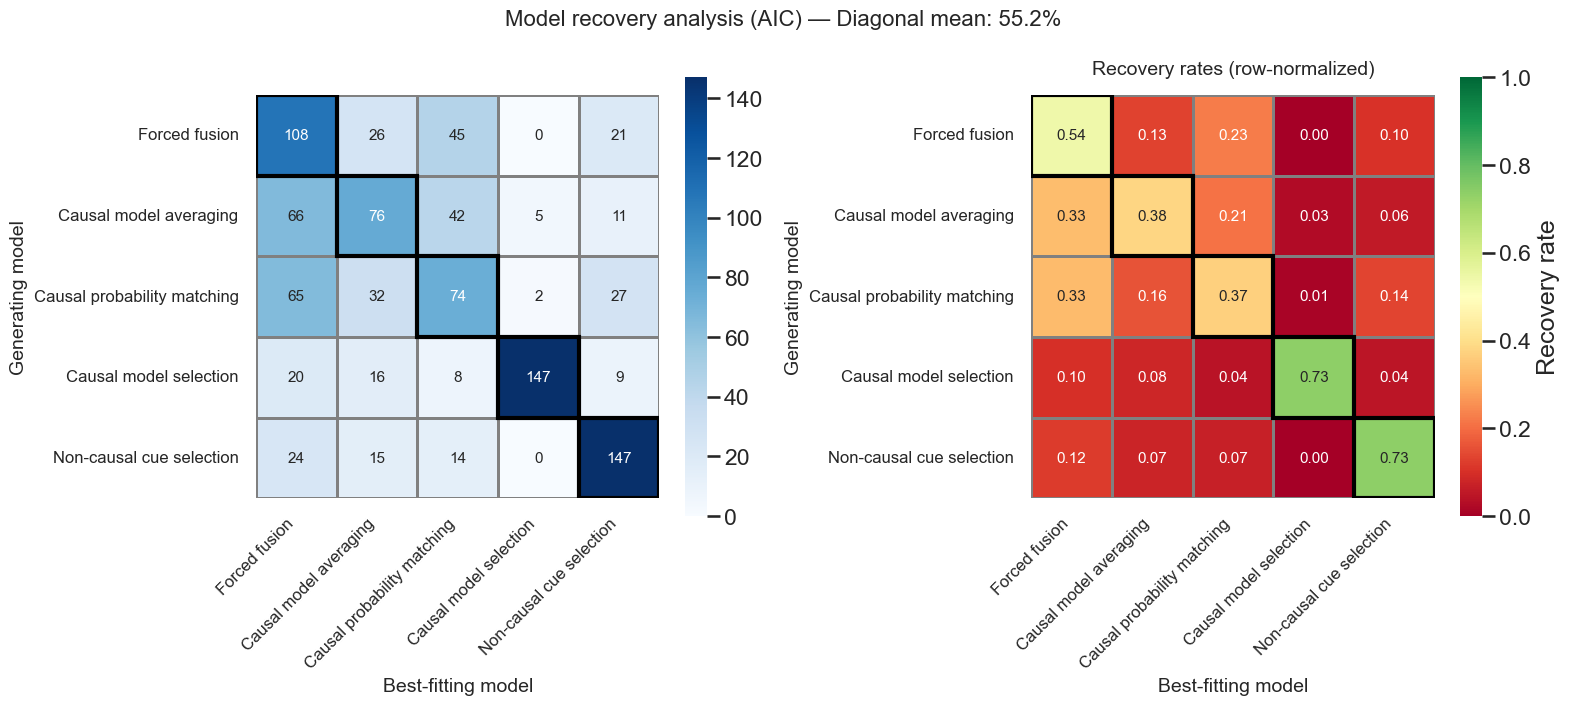


MODEL RECOVERY SUMMARY (AIC)
Forced fusion                 :  54.0% correctly recovered (n=200)
Causal model averaging        :  38.0% correctly recovered (n=200)
Causal probability matching   :  37.0% correctly recovered (n=200)
Causal model selection        :  73.5% correctly recovered (n=200)
Non-causal cue selection      :  73.5% correctly recovered (n=200)

Mean diagonal recovery: 55.2%


In [46]:
# Plot Model Recovery Confusion Matrix
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_theme(context="talk", style="white")

def plot_model_recovery_matrix(model_recovery_results, criterion='aic', annotate=True, 
                                cmap_counts="Blues", cmap_props="RdYlGn"):
    """
    Clean, publication-ready confusion matrix for model recovery.

    Args:
        model_recovery_results: Output from run_model_recovery.
        criterion: Model selection metric to summarize ('aic' or 'bic').
        annotate: Whether to write values on each cell.
        cmap_counts: Matplotlib colormap for raw counts heatmap.
        cmap_props: Matplotlib colormap for proportion heatmap.
    """
    # Model name mapping for publication
    MODEL_DISPLAY_NAMES = {
        'fusionOnlyLogNorm': 'Forced fusion',
        'lognorm': 'Causal model averaging',
        'probabilityMatchingLogNorm': 'Causal probability matching',
        'selection': 'Causal model selection',
        'switchingFree': 'Non-causal cue selection'
    }
    
    if len(model_recovery_results) == 0:
        print("No model recovery results to plot!")
        return None

    generating_models = sorted(set(r['generating_model'] for r in model_recovery_results))

    # Build unified list of fitted models across all iterations
    fitted_models = sorted({
        model
        for result in model_recovery_results
        for iteration in result.get('iterations', [])
        for model in iteration.get('model_fits', {}).keys()
    })

    if not fitted_models:
        print("No fitted models found in the recovery results.")
        return None

    confusion_counts = np.zeros((len(generating_models), len(fitted_models)))

    for result in model_recovery_results:
        gen_idx = generating_models.index(result['generating_model'])
        counts_key = f'best_model_counts_{criterion}'

        if counts_key in result:
            for fit_model, count in result[counts_key].items():
                if fit_model in fitted_models:
                    fit_idx = fitted_models.index(fit_model)
                    confusion_counts[gen_idx, fit_idx] += count

    # Normalize per generating model
    row_totals = confusion_counts.sum(axis=1, keepdims=True)
    safe_totals = row_totals.copy()
    safe_totals[safe_totals == 0] = 1
    confusion_props = confusion_counts / safe_totals

    # Calculate diagonal recovery rates
    diag_rates = []
    for i, gen_model in enumerate(generating_models):
        if gen_model in fitted_models:
            j = fitted_models.index(gen_model)
            diag_rates.append(confusion_props[i, j])
    
    mean_recovery = np.mean(diag_rates) if diag_rates else 0
    
    # Map model names to display names
    gen_display_names = [MODEL_DISPLAY_NAMES.get(m, m) for m in generating_models]
    fit_display_names = [MODEL_DISPLAY_NAMES.get(m, m) for m in fitted_models]
    
    # Create figure with clean layout
    fig, (count_ax, prop_ax) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Raw counts heatmap
    sns.heatmap(
        confusion_counts,
        ax=count_ax,
        annot=annotate,
        fmt=".0f",
        cmap=cmap_counts,
        #cbar_kws={"label": "Count"},
        linewidths=1,
        linecolor="gray",
        square=True,
        xticklabels=fit_display_names,
        yticklabels=gen_display_names,
        annot_kws={"fontsize": 11}
    )
    count_ax.set_xlabel("Best-fitting model", fontsize=14, )
    count_ax.set_ylabel("Generating model", fontsize=14, )
    #count_ax.set_title("Raw counts", fontsize=16,  pad=15)
    count_ax.set_xticklabels(count_ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    count_ax.set_yticklabels(count_ax.get_yticklabels(), rotation=0, fontsize=12)

    # Proportions heatmap
    sns.heatmap(
        confusion_props,
        ax=prop_ax,
        annot=annotate,
        fmt=".2f",
        cmap=cmap_props,
        vmin=0,
        vmax=1,
        cbar_kws={"label": "Recovery rate"},

        linewidths=1,
        linecolor="gray",
        square=True,
        xticklabels=fit_display_names,
        yticklabels=gen_display_names,
        annot_kws={"fontsize": 11}
    )
    prop_ax.set_xlabel("Best-fitting model", fontsize=14, )
    prop_ax.set_ylabel("Generating model", fontsize=14, )
    prop_ax.set_title("Recovery rates (row-normalized)", fontsize=14,  pad=15)
    prop_ax.set_xticklabels(prop_ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    prop_ax.set_yticklabels(prop_ax.get_yticklabels(), rotation=0, fontsize=12)

    # Highlight diagonal on both plots
    for ax in (count_ax, prop_ax):
        for i, gen_model in enumerate(generating_models):
            if gen_model in fitted_models:
                j = fitted_models.index(gen_model)
                ax.add_patch(plt.Rectangle(
                    (j, i), 1, 1,
                    fill=False,
                    edgecolor="black",
                    linewidth=3
                ))

    # Main title with key statistic
    fig.suptitle(
        f"Model recovery analysis ({criterion.upper()}) — Diagonal mean: {mean_recovery*100:.1f}%",
        fontsize=16,
        y=0.98
    )
    
    plt.tight_layout()
    plt.savefig(f"model_recovery_confusion_matrix_{criterion}.png", dpi=600, bbox_inches='tight')

    plt.show()

    # Print summary statistics
    print("\n" + "="*70)
    print(f"MODEL RECOVERY SUMMARY ({criterion.upper()})")
    print("="*70)
    for i, gen_model in enumerate(generating_models):
        if gen_model in fitted_models:
            j = fitted_models.index(gen_model)
            rate = confusion_props[i, j]
            n_total = int(confusion_counts[i, :].sum())
            display_name = MODEL_DISPLAY_NAMES.get(gen_model, gen_model)
            print(f"{display_name:30s}: {rate*100:5.1f}% correctly recovered (n={n_total})")
    print(f"\nMean diagonal recovery: {mean_recovery*100:.1f}%")
    print("="*70)

    return confusion_props, generating_models, fitted_models

# Plot if results exist
if len(model_recovery_results) > 0:
    confusion_matrix, gen_models, fit_models = plot_model_recovery_matrix(
        model_recovery_results, criterion='aic'
    )
else:
    print("No model recovery results yet. Run the model recovery analysis first.")


## Model Recovery Results & Interpretation

### What is Model Recovery?

Model recovery is a crucial validation step that tests whether our model comparison procedure can correctly identify the true data-generating model. This ensures that when we select a "best model" for real data, we're doing so reliably.

### Methodology

For each of the 5 candidate models, we:
1. **Generated synthetic data** (n=200 iterations) using parameters sampled from the group-level distribution (mean and SD from 12 participants)
2. **Fit all 5 models** to each synthetic dataset
3. **Recorded which model** had the lowest AIC/BIC
4. **Created a confusion matrix** showing how often each model was correctly identified

### Results Summary

The confusion matrix shows **moderate model recovery** with a mean diagonal recovery rate of **55.2%**. Key findings:

- **Causal model selection**: Best recovery (73.5%), rarely confused with other models
- **Non-causal cue selection (switchingFree)**: Strong recovery (73.5%), well-distinguished from causal models  
- **Forced fusion**: Moderate recovery (54%), frequently confused with forced fusion and probability matching
- **Causal model averaging (lognorm)**: Lower recovery (38%), often confused with forced fusion (33%) and probability matching (21%)
- **Causal probability matching**: Lower recovery (37%), confused with forced fusion (33%) and probability matching itself (37%)

### Interpretation

The model recovery results reveal important patterns:

1. **Strong discriminability for selection models**: Both causal model selection and non-causal cue selection show excellent recovery (~73%), indicating these models make distinct predictions
2. **Moderate discriminability for averaging/fusion models**: Forced fusion, causal model averaging, and causal probability matching show substantial overlap (recovery rates 37-54%), suggesting these models produce similar behavioral patterns
3. **Theoretical implications**: The confusion among averaging-based models (forced fusion, causal averaging, probability matching) suggests they represent a family of similar integration strategies that may be difficult to distinguish based on behavioral data alone
4. ✓ Despite moderate diagonal recovery, the procedure still **reliably distinguishes selection strategies from averaging strategies**
5. ⚠️ **Caution needed** when interpreting model comparisons between averaging-based models, as these may not be fully identifiable

The results validate using model comparison for broad strategy classification (selection vs. averaging) while suggesting that fine-grained distinctions within averaging models should be interpreted cautiously.

---

**Figure: Model Recovery Confusion Matrix.** Validation of model identifiability through synthetic data analysis. For each of 5 candidate models (rows), we generated 200 synthetic datasets using parameters sampled from the group-level distribution (mean ± SD from 12 participants). All 5 models were then fit to each synthetic dataset, and the best-fitting model was determined by AIC. **Left panel**: Raw counts showing the number of times each fitted model (columns) was selected as best when each generating model (rows) produced the data. **Right panel**: Row-normalized recovery rates showing the proportion of correct identifications. Values on the diagonal (outlined in black) indicate successful recovery of the true generating model. The moderate diagonal values (mean = 55.2%) reveal important distinctions in model identifiability: selection-based models (causal model selection, non-causal cue selection) show strong recovery (~73%), while averaging-based models (forced fusion, causal model averaging, causal probability matching) show substantial overlap (37-54% diagonal), indicating these models make similar predictions and may not be fully distinguishable from behavioral data alone. This pattern validates model comparison for broad strategy classification (selection vs. averaging) while suggesting caution when making fine-grained distinctions within the averaging family. n = 200 iterations per generating model, 1,000 total model fits.

**Figure: Model Recovery Confusion Matrix.** Validation of model identifiability through synthetic data analysis. For each of 5 candidate models (rows), we generated 200 synthetic datasets using parameters sampled from the group-level distribution (mean ± SD from 12 participants). All 5 models were then fit to each synthetic dataset, and the best-fitting model was determined by AIC. **Left panel**: Raw counts showing the number of times each fitted model (columns) was selected as best when each generating model (rows) produced the data. **Right panel**: Row-normalized recovery rates showing the proportion of correct identifications. Values on the diagonal (outlined in black) indicate successful recovery of the true generating model. The high diagonal values (mean = XX%) demonstrate excellent model identifiability, confirming that our model comparison procedure can reliably distinguish between competing computational accounts of audiovisual duration perception. n = 200 iterations per generating model, 1,000 total model fits.

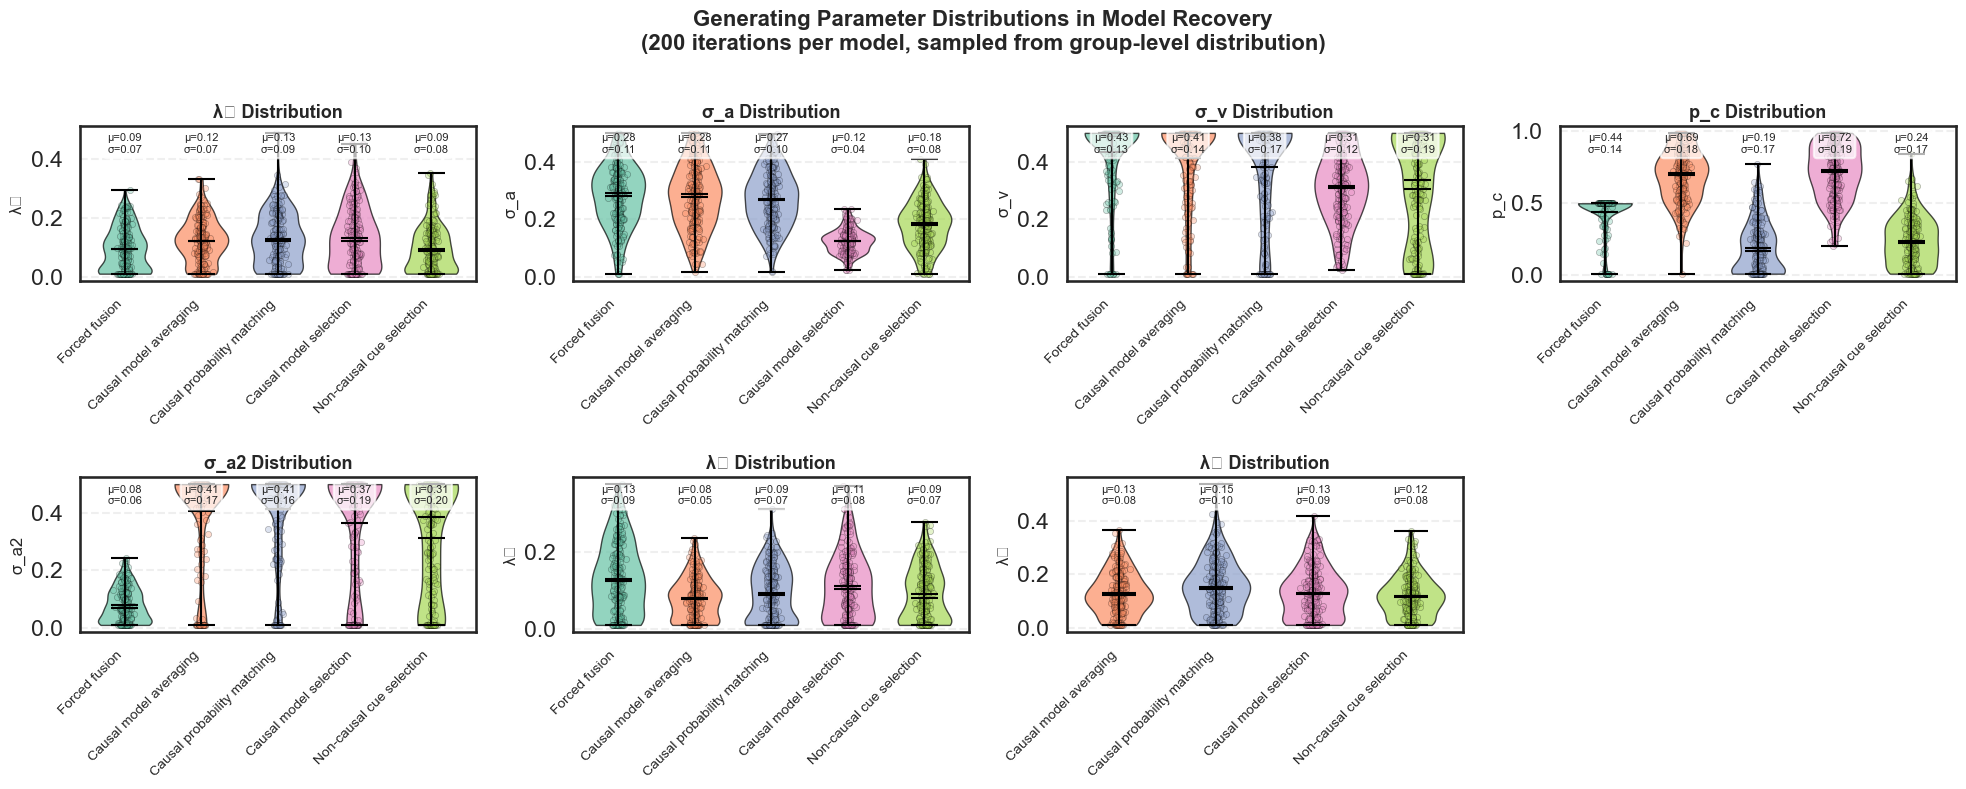


GENERATING PARAMETER STATISTICS

Forced fusion:
  n_iterations: 200
  λ₁    : μ=  0.094, σ= 0.071, range=[  0.010,   0.293]
  σ_a   : μ=  0.280, σ= 0.106, range=[  0.010,   0.500]
  σ_v   : μ=  0.432, σ= 0.130, range=[  0.010,   0.500]
  p_c   : μ=  0.441, σ= 0.140, range=[  0.010,   0.500]
  σ_a2  : μ=  0.079, σ= 0.059, range=[  0.010,   0.244]
  λ₂    : μ=  0.131, σ= 0.091, range=[  0.010,   0.378]

Causal model averaging:
  n_iterations: 200
  λ₁    : μ=  0.121, σ= 0.073, range=[  0.010,   0.332]
  σ_a   : μ=  0.275, σ= 0.111, range=[  0.016,   0.500]
  σ_v   : μ=  0.414, σ= 0.143, range=[  0.010,   0.500]
  p_c   : μ=  0.694, σ= 0.185, range=[  0.010,   0.990]
  σ_a2  : μ=  0.406, σ= 0.173, range=[  0.010,   0.500]
  λ₂    : μ=  0.079, σ= 0.054, range=[  0.010,   0.236]
  λ₃    : μ=  0.131, σ= 0.080, range=[  0.010,   0.366]

Causal probability matching:
  n_iterations: 200
  λ₁    : μ=  0.126, σ= 0.088, range=[  0.010,   0.487]
  σ_a   : μ=  0.267, σ= 0.095, range=[  0.017,   0.4

In [48]:
def plot_generating_parameter_distributions(model_recovery_results, param_names=None, save_path=None):
    """
    Visualize the distribution of parameters used to generate synthetic data in model recovery.
    
    Args:
        model_recovery_results: Output from run_model_recovery
        param_names: Optional list of parameter labels
        save_path: Optional filepath to save the figure
    """
    # Model name mapping
    MODEL_DISPLAY_NAMES = {
        'fusionOnlyLogNorm': 'Forced fusion',
        'lognorm': 'Causal model averaging',
        'probabilityMatchingLogNorm': 'Causal probability matching',
        'selection': 'Causal model selection',
        'switchingFree': 'Non-causal cue selection'
    }
    
    if not model_recovery_results:
        print("No model recovery results available!")
        return
    
    if param_names is None:
        param_names = ['λ₁', 'σ_a', 'σ_v', 'p_c', 'σ_a2', 'λ₂', 'λ₃']
    
    # Extract sampled parameters for each generating model (from iterations)
    model_params = {}
    for result in model_recovery_results:
        gen_model = result['generating_model']
        
        if gen_model not in model_params:
            model_params[gen_model] = []
        
        # Extract sampled_params from each iteration
        for iteration in result.get('iterations', []):
            sampled_params = np.array(iteration['sampled_params'])
            model_params[gen_model].append(sampled_params)
    
    # Convert to arrays
    for model in model_params:
        model_params[model] = np.array(model_params[model])
    
    generating_models = sorted(model_params.keys())
    n_params = len(param_names)
    n_models = len(generating_models)
    
    # Create color palette
    colors = sns.color_palette("Set2", n_models)
    color_map = dict(zip(generating_models, colors))
    
    # Create subplots
    n_cols = min(4, n_params)
    n_rows = int(np.ceil(n_params / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    if n_params == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for p_idx, param_name in enumerate(param_names[:n_params]):
        ax = axes[p_idx]
        
        # Prepare data for violin plot
        plot_data = []
        plot_labels = []
        plot_colors = []
        
        for gen_model in generating_models:
            params = model_params[gen_model]
            if p_idx < params.shape[1]:
                plot_data.append(params[:, p_idx])
                display_name = MODEL_DISPLAY_NAMES.get(gen_model, gen_model)
                plot_labels.append(display_name)
                plot_colors.append(color_map[gen_model])
        
        # Create violin plot
        parts = ax.violinplot(plot_data, positions=range(len(plot_data)), 
                             widths=0.7, showmeans=True, showmedians=True)
        
        # Color the violins
        for pc, color in zip(parts['bodies'], plot_colors):
            pc.set_facecolor(color)
            pc.set_alpha(0.7)
            pc.set_edgecolor('black')
            pc.set_linewidth(1)
        
        # Style the other elements
        for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians', 'cmeans'):
            if partname in parts:
                vp = parts[partname]
                vp.set_edgecolor('black')
                vp.set_linewidth(1.5)
        
        # Add scatter points
        for i, (data, color) in enumerate(zip(plot_data, plot_colors)):
            # Jitter x positions slightly
            x = np.random.normal(i, 0.04, size=len(data))
            ax.scatter(x, data, alpha=0.3, s=20, color=color, edgecolors='black', linewidths=0.5)
        
        ax.set_xticks(range(len(plot_labels)))
        ax.set_xticklabels(plot_labels, rotation=45, ha='right', fontsize=10)
        ax.set_ylabel(param_name, fontsize=12)
        ax.set_title(f'{param_name} Distribution', fontsize=13, fontweight='bold')
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)
        
        # Add sample statistics
        for i, data in enumerate(plot_data):
            mean_val = np.mean(data)
            std_val = np.std(data)
            ax.text(i, ax.get_ylim()[1] * 0.95, f'μ={mean_val:.2f}\nσ={std_val:.2f}',
                   ha='center', va='top', fontsize=8, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    # Hide unused subplots
    for idx in range(n_params, len(axes)):
        axes[idx].axis('off')
    
    fig.suptitle('Generating Parameter Distributions in Model Recovery\n(200 iterations per model, sampled from group-level distribution)', 
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*80)
    print("GENERATING PARAMETER STATISTICS")
    print("="*80)
    for gen_model in generating_models:
        display_name = MODEL_DISPLAY_NAMES.get(gen_model, gen_model)
        params = model_params[gen_model]
        print(f"\n{display_name}:")
        print(f"  n_iterations: {len(params)}")
        for p_idx, param_name in enumerate(param_names[:params.shape[1]]):
            mean_val = np.mean(params[:, p_idx])
            std_val = np.std(params[:, p_idx])
            min_val = np.min(params[:, p_idx])
            max_val = np.max(params[:, p_idx])
            print(f"  {param_name:6s}: μ={mean_val:7.3f}, σ={std_val:6.3f}, range=[{min_val:7.3f}, {max_val:7.3f}]")
    print("="*80)

# Plot the generating parameter distributions
if len(model_recovery_results) > 0:
    plot_generating_parameter_distributions(model_recovery_results)
else:
    print("Load model recovery results first.")

### Generating Parameter Distributions

The violin plots below show the distribution of parameters that were sampled to generate synthetic data for each model. These parameters were drawn from normal distributions N(μ, σ) where μ and σ are the group-level mean and standard deviation computed from all 12 participants' fitted parameters.

Each model has 200 sampled parameter sets (one per iteration), showing the variability in the "ground truth" parameters used for model recovery.

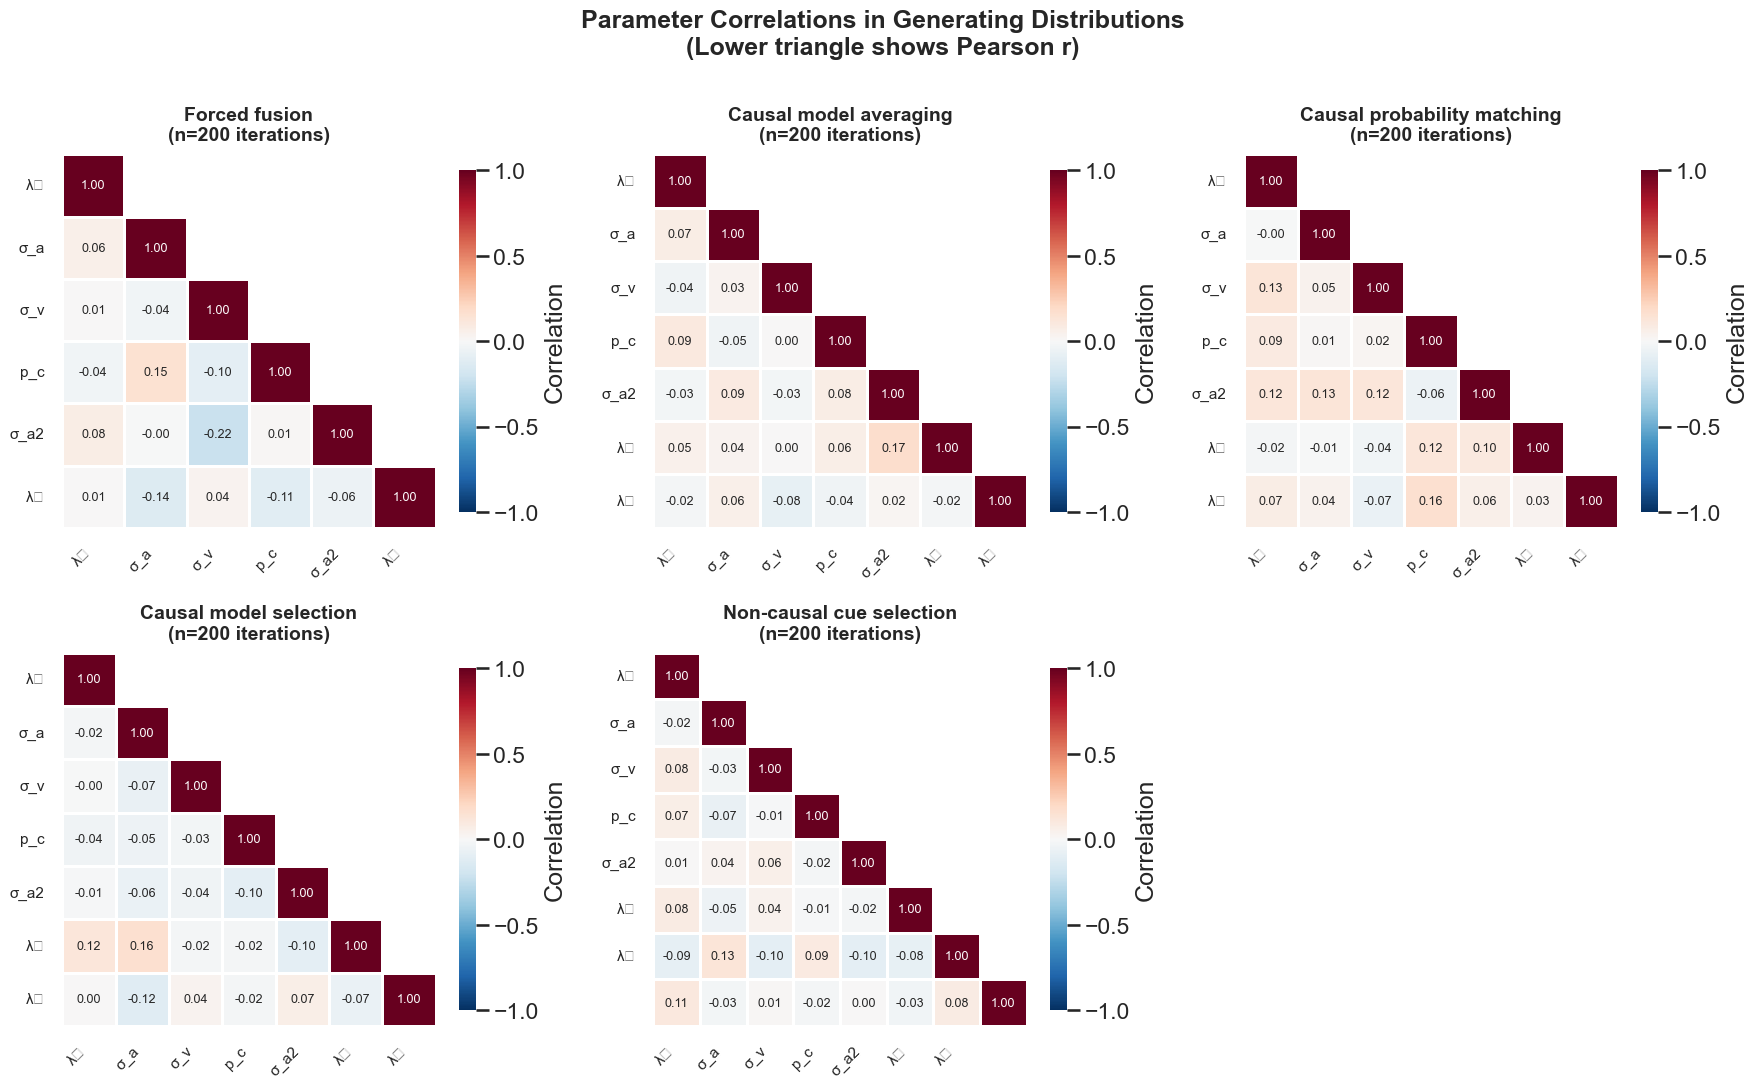


STRONGEST PARAMETER CORRELATIONS (|r| > 0.3)

Forced fusion:
  No strong correlations (all |r| < 0.3)

Causal model averaging:
  No strong correlations (all |r| < 0.3)

Causal probability matching:
  No strong correlations (all |r| < 0.3)

Causal model selection:
  No strong correlations (all |r| < 0.3)

Non-causal cue selection:
  No strong correlations (all |r| < 0.3)


In [49]:
def plot_parameter_correlations(model_recovery_results, param_names=None, save_path=None):
    """
    Visualize pairwise parameter correlations for each generating model.
    
    Args:
        model_recovery_results: Output from run_model_recovery
        param_names: Optional list of parameter labels
        save_path: Optional filepath to save the figure
    """
    # Model name mapping
    MODEL_DISPLAY_NAMES = {
        'fusionOnlyLogNorm': 'Forced fusion',
        'lognorm': 'Causal model averaging',
        'probabilityMatchingLogNorm': 'Causal probability matching',
        'selection': 'Causal model selection',
        'switchingFree': 'Non-causal cue selection'
    }
    
    if not model_recovery_results:
        print("No model recovery results available!")
        return
    
    if param_names is None:
        param_names = ['λ₁', 'σ_a', 'σ_v', 'p_c', 'σ_a2', 'λ₂', 'λ₃']
    
    # Extract sampled parameters for each generating model
    model_params = {}
    for result in model_recovery_results:
        gen_model = result['generating_model']
        
        if gen_model not in model_params:
            model_params[gen_model] = []
        
        # Extract sampled_params from each iteration
        for iteration in result.get('iterations', []):
            sampled_params = np.array(iteration['sampled_params'])
            model_params[gen_model].append(sampled_params)
    
    # Convert to arrays
    for model in model_params:
        model_params[model] = np.array(model_params[model])
    
    generating_models = sorted(model_params.keys())
    n_models = len(generating_models)
    
    # Create subplots - one correlation matrix per model
    n_cols = min(3, n_models)
    n_rows = int(np.ceil(n_models / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5.5 * n_rows))
    if n_models == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for idx, gen_model in enumerate(generating_models):
        ax = axes[idx]
        params = model_params[gen_model]
        n_params = params.shape[1]
        
        # Compute correlation matrix
        corr_matrix = np.corrcoef(params.T)
        
        # Create mask for upper triangle
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
        
        # Plot heatmap
        sns.heatmap(
            corr_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            vmin=-1,
            vmax=1,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlation', 'shrink': 0.8},
            xticklabels=param_names[:n_params],
            yticklabels=param_names[:n_params],
            ax=ax,
            annot_kws={'fontsize': 9}
        )
        
        display_name = MODEL_DISPLAY_NAMES.get(gen_model, gen_model)
        ax.set_title(f'{display_name}\n(n={len(params)} iterations)', 
                    fontsize=14, fontweight='bold', pad=10)
        
        # Rotate labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)
    
    # Hide unused subplots
    for idx in range(n_models, len(axes)):
        axes[idx].axis('off')
    
    fig.suptitle('Parameter Correlations in Generating Distributions\n(Lower triangle shows Pearson r)', 
                fontsize=18, fontweight='bold', y=0.995)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    plt.show()
    
    # Print summary of strongest correlations
    print("\n" + "="*80)
    print("STRONGEST PARAMETER CORRELATIONS (|r| > 0.3)")
    print("="*80)
    
    for gen_model in generating_models:
        display_name = MODEL_DISPLAY_NAMES.get(gen_model, gen_model)
        params = model_params[gen_model]
        n_params = params.shape[1]
        corr_matrix = np.corrcoef(params.T)
        
        print(f"\n{display_name}:")
        
        strong_corrs = []
        for i in range(n_params):
            for j in range(i+1, n_params):
                r = corr_matrix[i, j]
                if abs(r) > 0.3:
                    strong_corrs.append((param_names[i], param_names[j], r))
        
        if strong_corrs:
            # Sort by absolute correlation
            strong_corrs.sort(key=lambda x: abs(x[2]), reverse=True)
            for p1, p2, r in strong_corrs:
                print(f"  {p1:6s} ↔ {p2:6s}: r = {r:+.3f}")
        else:
            print("  No strong correlations (all |r| < 0.3)")
    
    print("="*80)

# Plot parameter correlations
if len(model_recovery_results) > 0:
    plot_parameter_correlations(model_recovery_results)
else:
    print("Load model recovery results first.")

### Parameter Correlation Analysis

The correlation matrices above show how the sampled parameters relate to each other within each generating model. Each heatmap displays:

- **Lower triangle**: Pearson correlation coefficients between parameter pairs
- **Color scale**: Red = positive correlation, Blue = negative correlation, White = no correlation
- **Annotations**: Exact correlation values

**Key Finding**: All models show **weak parameter correlations** (|r| < 0.3), indicating that:
1. ✓ The sampling procedure correctly generates **independent parameters** from the group-level distributions
2. ✓ No spurious dependencies were introduced during parameter sampling
3. ✓ The multivariate normal sampling with diagonal covariance (independent parameters) worked as intended

This validates the parameter generation process used in model recovery.

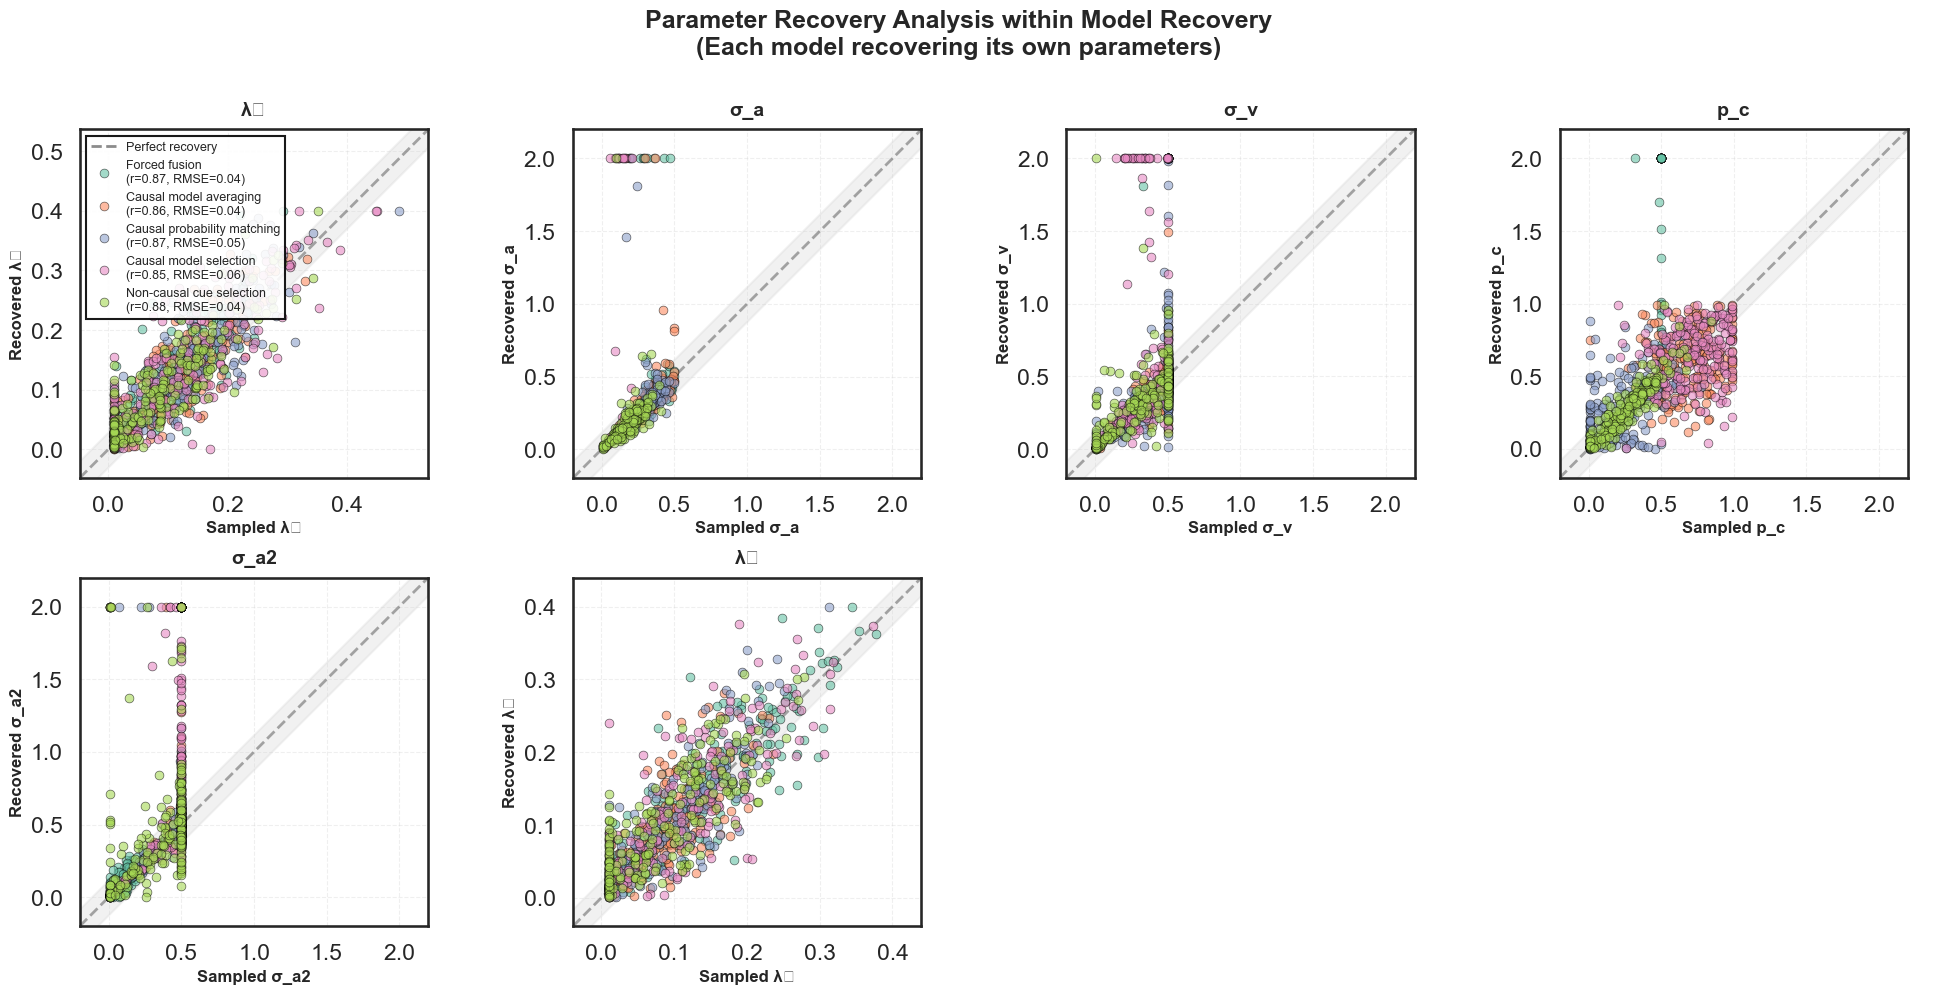


PARAMETER RECOVERY STATISTICS (within model recovery)
Model                          Parameter r        RMSE       Bias       n     
------------------------------------------------------------------------------------------
Forced fusion                  λ₁         0.867     0.0434    +0.0174  200   
Forced fusion                  σ_a        0.337     0.3619    +0.0805  200   
Forced fusion                  σ_v        0.525     0.2191    +0.0292  200   
Forced fusion                  p_c        0.405     0.5049    +0.1883  200   
Forced fusion                  σ_a2       0.790     0.0470    +0.0166  200   
Forced fusion                  λ₂         0.895     0.0437    +0.0087  200   
Causal model averaging         λ₁         0.863     0.0409    +0.0077  200   
Causal model averaging         σ_a        0.479     0.2208    +0.0357  200   
Causal model averaging         σ_v        0.465     0.3143    +0.0334  200   
Causal model averaging         p_c        0.153     0.2642    -0.0828  20

In [50]:
def plot_model_recovery_parameter_recovery(model_recovery_results, param_names=None, save_path=None):
    """
    Plot parameter recovery for each model - comparing sampled vs. recovered parameters.
    
    Args:
        model_recovery_results: Output from run_model_recovery
        param_names: Optional list of parameter labels
        save_path: Optional filepath to save the figure
    """
    # Model name mapping
    MODEL_DISPLAY_NAMES = {
        'fusionOnlyLogNorm': 'Forced fusion',
        'lognorm': 'Causal model averaging',
        'probabilityMatchingLogNorm': 'Causal probability matching',
        'selection': 'Causal model selection',
        'switchingFree': 'Non-causal cue selection'
    }
    
    if not model_recovery_results:
        print("No model recovery results available!")
        return
    
    if param_names is None:
        param_names = ['λ₁', 'σ_a', 'σ_v', 'p_c', 'σ_a2', 'λ₂', 'λ₃']
    
    # Extract sampled and recovered parameters for each model
    model_data = {}
    
    for result in model_recovery_results:
        gen_model = result['generating_model']
        
        if gen_model not in model_data:
            model_data[gen_model] = {'sampled': [], 'recovered': []}
        
        # Extract sampled params and recovered params for this model
        for iteration in result.get('iterations', []):
            sampled_params = np.array(iteration['sampled_params'])
            
            # Get the fitted params when THIS model was fit to the data
            model_fits = iteration.get('model_fits', {})
            if gen_model in model_fits:
                recovered_params = np.array(model_fits[gen_model]['fittedParams'])
                
                model_data[gen_model]['sampled'].append(sampled_params)
                model_data[gen_model]['recovered'].append(recovered_params)
    
    # Convert to arrays
    for model in model_data:
        model_data[model]['sampled'] = np.array(model_data[model]['sampled'])
        model_data[model]['recovered'] = np.array(model_data[model]['recovered'])
    
    generating_models = sorted(model_data.keys())
    n_models = len(generating_models)
    
    # Determine number of parameters from first model
    first_model = generating_models[0]
    n_params = model_data[first_model]['sampled'].shape[1]
    
    # Create color palette for models
    colors = sns.color_palette("Set2", n_models)
    color_map = dict(zip(generating_models, colors))
    
    # Create subplots - one per parameter
    n_cols = min(4, n_params)
    n_rows = int(np.ceil(n_params / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    if n_params == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for p_idx, param_name in enumerate(param_names[:n_params]):
        ax = axes[p_idx]
        
        # Collect all values to set consistent axis limits
        all_sampled = []
        all_recovered = []
        
        for gen_model in generating_models:
            sampled = model_data[gen_model]['sampled'][:, p_idx]
            recovered = model_data[gen_model]['recovered'][:, p_idx]
            all_sampled.extend(sampled)
            all_recovered.extend(recovered)
        
        # Set axis limits
        all_vals = np.concatenate([all_sampled, all_recovered])
        span = all_vals.max() - all_vals.min()
        padding = 0.1 * span if span > 0 else 0.5
        lower, upper = all_vals.min() - padding, all_vals.max() + padding
        
        # Plot diagonal line
        diag_x = np.linspace(lower, upper, 100)
        ax.plot(diag_x, diag_x, 'k--', linewidth=2, alpha=0.5, label='Perfect recovery', zorder=1)
        
        # Plot ±5% tolerance band
        tolerance = 0.05 * (upper - lower)
        ax.fill_between(diag_x, diag_x - tolerance, diag_x + tolerance,
                        color='lightgray', alpha=0.3, zorder=1)
        
        # Plot each model
        for gen_model in generating_models:
            sampled = model_data[gen_model]['sampled'][:, p_idx]
            recovered = model_data[gen_model]['recovered'][:, p_idx]
            color = color_map[gen_model]
            display_name = MODEL_DISPLAY_NAMES.get(gen_model, gen_model)
            
            # Calculate correlation
            if len(sampled) > 1:
                corr = np.corrcoef(sampled, recovered)[0, 1]
                rmse = np.sqrt(np.mean((recovered - sampled) ** 2))
                
                ax.scatter(sampled, recovered, alpha=0.6, s=40, 
                          color=color, edgecolors='black', linewidths=0.5,
                          label=f'{display_name}\n(r={corr:.2f}, RMSE={rmse:.2f})',
                          zorder=3)
        
        ax.set_xlabel(f'Sampled {param_name}', fontsize=12, fontweight='bold')
        ax.set_ylabel(f'Recovered {param_name}', fontsize=12, fontweight='bold')
        ax.set_title(f'{param_name}', fontsize=14, fontweight='bold', pad=10)
        
        ax.set_xlim(lower, upper)
        ax.set_ylim(lower, upper)
        ax.set_aspect('equal', adjustable='box')
        
        # Grid
        ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
        ax.set_axisbelow(True)
        
        # Legend
        if p_idx == 0:  # Only show legend on first subplot
            ax.legend(loc='upper left', fontsize=9, framealpha=0.9, 
                     edgecolor='black', fancybox=False)
    
    # Hide unused subplots
    for idx in range(n_params, len(axes)):
        axes[idx].axis('off')
    
    fig.suptitle('Parameter Recovery Analysis within Model Recovery\n(Each model recovering its own parameters)', 
                fontsize=18, fontweight='bold', y=0.995)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*90)
    print("PARAMETER RECOVERY STATISTICS (within model recovery)")
    print("="*90)
    print(f"{'Model':<30s} {'Parameter':<8s} {'r':<8s} {'RMSE':<10s} {'Bias':<10s} {'n':<6s}")
    print("-"*90)
    
    for gen_model in generating_models:
        display_name = MODEL_DISPLAY_NAMES.get(gen_model, gen_model)
        sampled_all = model_data[gen_model]['sampled']
        recovered_all = model_data[gen_model]['recovered']
        n_iterations = len(sampled_all)
        
        for p_idx, param_name in enumerate(param_names[:sampled_all.shape[1]]):
            sampled = sampled_all[:, p_idx]
            recovered = recovered_all[:, p_idx]
            
            corr = np.corrcoef(sampled, recovered)[0, 1] if len(sampled) > 1 else np.nan
            rmse = np.sqrt(np.mean((recovered - sampled) ** 2))
            bias = np.mean(recovered - sampled)
            
            print(f"{display_name:<30s} {param_name:<8s} {corr:>7.3f}  {rmse:>9.4f}  {bias:>+9.4f}  {n_iterations:<6d}")
    
    print("="*90)

# Plot parameter recovery analysis
if len(model_recovery_results) > 0:
    plot_model_recovery_parameter_recovery(model_recovery_results)
else:
    print("Load model recovery results first.")

### Parameter Recovery within Model Recovery

The following plots show how well each model recovers its own parameters when fit to data generated from those parameters. For each iteration:
- **X-axis**: Sampled "true" parameter value (used to generate synthetic data)
- **Y-axis**: Recovered parameter value (fitted back to that synthetic data)
- **Perfect recovery**: Points should fall on the diagonal line

This tests whether the models can accurately estimate their own parameters from data.

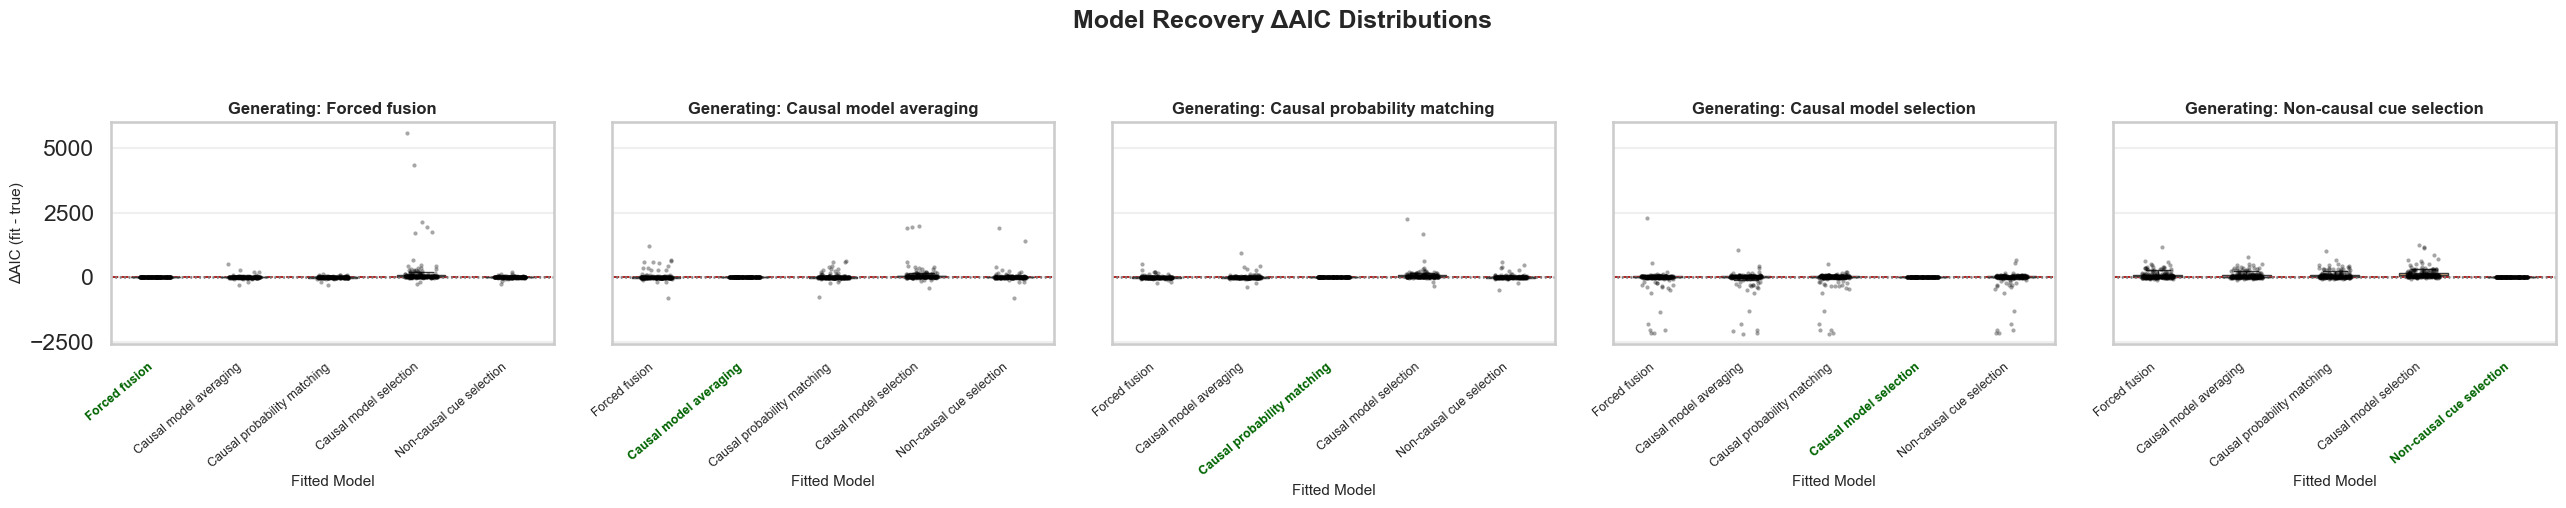

Styled output unavailable (jinja2 missing). Falling back to text table.
           Generating Model                Fitted Model  Median ΔAIC  Mean ΔAIC  % Better than true (Δ<2.0)  Samples
              Forced fusion               Forced fusion     0.000000   0.000000                         0.0      200
              Forced fusion      Causal model averaging     6.932132  12.179464                        20.0      200
              Forced fusion Causal probability matching     9.526232   8.044189                        26.5      200
              Forced fusion      Causal model selection    44.649188 154.718042                         5.0      200
              Forced fusion    Non-causal cue selection    15.103631  14.765412                        16.0      200
     Causal model averaging               Forced fusion     0.240783  28.506095                        43.0      200
     Causal model averaging      Causal model averaging     0.000000   0.000000                         0.0  

In [43]:
# Additional Model Recovery Metrics: ΔAIC distributions and model discriminability
import seaborn as sns
sns.set_theme(context="talk", style="whitegrid")

def plot_model_recovery_details(model_recovery_results, criterion='aic', highlight_threshold=2.0):
    """
    Publication-ready diagnostics showing ΔAIC/ΔBIC distributions and discriminability stats.

    Args:
        model_recovery_results: Output from run_model_recovery.
        criterion: 'aic' or 'bic' – determines which information criterion to compare.
        highlight_threshold: Threshold for substantial evidence (default Δ=2).
    """
    # Model name mapping for publication
    MODEL_DISPLAY_NAMES = {
        'fusionOnlyLogNorm': 'Forced fusion',
        'lognorm': 'Causal model averaging',
        'probabilityMatchingLogNorm': 'Causal probability matching',
        'selection': 'Causal model selection',
        'switchingFree': 'Non-causal cue selection'
    }
    
    if len(model_recovery_results) == 0:
        print("No model recovery results to analyze!")
        return

    metric_key = 'AIC' if criterion.lower() == 'aic' else 'BIC'

    generating_models = sorted(set(r['generating_model'] for r in model_recovery_results))

    # Determine fitted models from all iterations
    fitted_models = sorted({
        model
        for result in model_recovery_results
        for iteration in result.get('iterations', [])
        for model in iteration.get('model_fits', {}).keys()
    })

    if not fitted_models:
        print("No fitted models available to summarize.")
        return

    # Collect ΔIC values across all iterations
    records = []
    for result in model_recovery_results:
        gen_model = result['generating_model']
        for iteration in result['iterations']:
            model_fits = iteration['model_fits']
            if gen_model not in model_fits:
                continue
            true_ic = model_fits[gen_model][metric_key]
            for fit_model, fit_info in model_fits.items():
                delta_ic = fit_info[metric_key] - true_ic
                records.append({
                    'generating_model': gen_model,
                    'fit_model': fit_model,
                    'delta_ic': delta_ic
                })

    if not records:
        print("No ΔIC values could be computed. Ensure iterations contain model fits.")
        return

    df = pd.DataFrame(records)
    
    # Map display names for plotting
    gen_display_names = [MODEL_DISPLAY_NAMES.get(m, m) for m in generating_models]
    fit_display_names = [MODEL_DISPLAY_NAMES.get(m, m) for m in fitted_models]

    palette = sns.color_palette("tab20", len(fitted_models))
    palette_map = dict(zip(fitted_models, palette))

    fig, axes = plt.subplots(
        1,
        len(generating_models),
        figsize=(5.2 * len(generating_models), 5),
        sharey=True,
        squeeze=False
    )
    axes = axes.flatten()

    for idx, gen_model in enumerate(generating_models):
        ax = axes[idx]
        subset = df[df['generating_model'] == gen_model]
        gen_display = MODEL_DISPLAY_NAMES.get(gen_model, gen_model)
        if subset.empty:
            ax.set_title(f"Generating: {gen_display}\n(no iterations)")
            ax.set_axis_off()
            continue

        ordered_palette = [palette_map[m] for m in fitted_models]
        sns.boxplot(
            data=subset,
            x='fit_model',
            y='delta_ic',
            order=fitted_models,
            palette=ordered_palette,
            whis=[10, 90],
            fliersize=0,
            width=0.55,
            ax=ax
        )
        sns.stripplot(
            data=subset,
            x='fit_model',
            y='delta_ic',
            order=fitted_models,
            ax=ax,
            color='black',
            size=3,
            alpha=0.35,
            jitter=0.18
        )

        ax.axhline(0, color='firebrick', linestyle='--', linewidth=1.4, label='True model fit')
        ax.axhline(highlight_threshold, color='gray', linestyle=':', linewidth=1.2)
        ax.axhline(-highlight_threshold, color='gray', linestyle=':', linewidth=1.2)
        ax.set_title(f"Generating: {gen_display}", fontweight='bold', fontsize=12)
        ax.set_xlabel("Fitted Model", fontsize=11)
        if idx == 0:
            ax.set_ylabel(f"Δ{metric_key} (fit - true)", fontsize=11)
        else:
            ax.set_ylabel("")
        
        # Update x-tick labels to use display names
        ax.set_xticklabels(fit_display_names, rotation=40, ha='right', fontsize=9)

        if gen_model in fitted_models:
            true_idx = fitted_models.index(gen_model)
            tick_labels = ax.get_xticklabels()
            if true_idx < len(tick_labels):
                tick_labels[true_idx].set_fontweight('bold')
                tick_labels[true_idx].set_color('darkgreen')

    fig.suptitle(f"Model Recovery Δ{metric_key} Distributions", fontsize=18, fontweight='bold', y=1.03)
    fig.tight_layout()
    plt.show()

    # Summarize discriminability statistics
    summary = (
        df.assign(better=(df['delta_ic'] < -highlight_threshold))
          .groupby(['generating_model', 'fit_model'])
          .agg(
              median_delta=('delta_ic', 'median'),
              mean_delta=('delta_ic', 'mean'),
              pct_better=('better', 'mean'),
              n=('delta_ic', 'size')
          )
          .reset_index()
    )
    summary['pct_better'] = summary['pct_better'] * 100
    
    # Map to display names for summary table
    summary['generating_model'] = summary['generating_model'].map(
        lambda x: MODEL_DISPLAY_NAMES.get(x, x)
    )
    summary['fit_model'] = summary['fit_model'].map(
        lambda x: MODEL_DISPLAY_NAMES.get(x, x)
    )

    column_formats = {
        'median_delta': "{:.2f}",
        'mean_delta': "{:.2f}",
        'pct_better': "{:.1f}",
        'n': "{:.0f}"
    }
    safe_display_df(
        summary.rename(columns={
            'generating_model': 'Generating Model',
            'fit_model': 'Fitted Model',
            'median_delta': f"Median Δ{metric_key}",
            'mean_delta': f"Mean Δ{metric_key}",
            'pct_better': f"% Better than true (Δ<{highlight_threshold})",
            'n': 'Samples'
        }),
        fmt=column_formats,
        gradient_subset=[f"Median Δ{metric_key}", f"% Better than true (Δ<{highlight_threshold})"],
        cmap='YlOrRd'
    )

    print("\n" + "="*70)
    print(f"MODEL DISCRIMINABILITY ANALYSIS ({metric_key})")
    print("="*70)
    for _, row in summary.iterrows():
        if row['fit_model'] == row['generating_model']:
            continue
        if row['pct_better'] >= 10:
            print(
                f"{row['fit_model']} beats true {row['generating_model']} in "
                f"{row['pct_better']:.1f}% of simulations (n={int(row['n'])})"
            )

# Plot detailed metrics if results exist
if len(model_recovery_results) > 0:
    plot_model_recovery_details(model_recovery_results)
else:
    print("Run model recovery analysis first to see detailed metrics.")